In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-politics-2004-2019/IndiaVotes_PC__All_States_2009.csv
/kaggle/input/indian-politics-2004-2019/IndiaVotes_PC__All_States_2014.csv
/kaggle/input/indian-politics-2004-2019/2024.csv
/kaggle/input/indian-politics-2004-2019/2019.csv
/kaggle/input/indian-politics-2004-2019/2004.csv


### Data loading

In [2]:
import pandas as pd

In [3]:
df_2009 = pd.read_csv('/kaggle/input/indian-politics-2004-2019/IndiaVotes_PC__All_States_2009.csv')
df_2009.head()

PC Name  No Type                         State  \
0        Adilabad   1   ST                Andhra Pradesh   
1            Agra  18   SC  Uttar Pradesh [2000 Onwards]   
2      Ahmadnagar  37  GEN                   Maharashtra   
3  Ahmedabad East   7  GEN                       Gujarat   
4  Ahmedabad West   8   SC                       Gujarat   

                   Winning Candidate                  Party  Electors   Votes  \
0                      Rathod Ramesh           Telugu Desam   1131211  863248   
1                     Dr. Ramshankar  Bharatiya Janta Party   1539683  648793   
2       Gandhi Dilipkumar Mansukhlal  Bharatiya Janta Party   1517951  787153   
3                       Harin Pathak  Bharatiya Janta Party   1411761  597395   
4  Dr. Solanki Kiritbhai Premajibhai  Bharatiya Janta Party   1431080  690071   

  Turnout  Margin Margin %  
0  76.3 %  115087    13.3%  
1  42.1 %    9715     1.5%  
2  51.9 %   46731     5.9%  
3  42.3 %   86056    14.4%  
4  48.2 %   91127    13.2%

In [4]:
df_2014 = pd.read_csv('/kaggle/input/indian-politics-2004-2019/IndiaVotes_PC__All_States_2014.csv')
df_2014.head()

PC Name  No Type                         State  \
0        Adilabad   1   ST                     Telangana   
1            Agra  18   SC  Uttar Pradesh [2000 Onwards]   
2      Ahmadnagar  37  GEN                   Maharashtra   
3  Ahmedabad East   7  GEN                       Gujarat   
4  Ahmedabad West   8   SC                       Gujarat   

              Winning Candidate                      Party  Electors    Votes  \
0                  Godam Nagesh  Telangana Rashtra Samithi   1386233  1045839   
1      Dr. Ram Shankar Katheria      Bharatiya Janta Party   1814739  1070400   
2  Gandhi Dilipkumar Mansukhlal      Bharatiya Janta Party   1699408  1062318   
3                  Paresh Rawal      Bharatiya Janta Party   1601832   985525   
4           Dr. Kirit P Solanki      Bharatiya Janta Party   1534400   964609   

  Turnout  Margin Margin %  
0  75.4 %  171290    16.4%  
1  59.0 %  300263    28.1%  
2  62.5 %  209122    19.7%  
3  61.5 %  326633    33.1%  
4  62.9 %  320311    33.2%

In [5]:
df_2019 = pd.read_csv('/kaggle/input/indian-politics-2004-2019/2019.csv')
df_2019.head()

idx         PC Name  No Type                         State  \
0    1        Adilabad   1   ST                     Telangana   
1    2            Agra  18   SC  Uttar Pradesh [2000 Onwards]   
2    3      Ahmadnagar  37  GEN                   Maharashtra   
3    4  Ahmedabad East   7  GEN                       Gujarat   
4    5  Ahmedabad West   8   SC                       Gujarat   

                   Winning Candidate                  Party   Electors  \
0                     Soyam Bapu Rao  Bharatiya Janta Party  13,82,837   
1              Satyapal Singh Baghel  Bharatiya Janta Party  18,66,262   
2  Dr. Sujay Radhakrishna Vikhepatil  Bharatiya Janta Party  17,93,677   
3         Patel Hasmukhbhai Somabhai  Bharatiya Janta Party  17,13,598   
4               Dr. Kirit P. Solanki  Bharatiya Janta Party  15,80,673   

       Votes Turnout    Margin Margin %  year  
0  10,63,730  77.9 %    58,560     5.5%  2019  
1  11,45,323  61.7 %  2,11,546    18.5%  2019  
2  12,03,797  67.3 %  2,81,474    23.4%  2019  
3  11,16,367  65.7 %  4,34,330    38.9%  2019  
4   9,97,024  64.0 %  3,21,546    32.3%  2019

In [6]:
df_2024 = pd.read_csv('/kaggle/input/indian-politics-2004-2019/2024.csv')
df_2024.head()

idx         PC Name  No Type                         State  \
0    1        Adilabad   1   ST                     Telangana   
1    2            Agra  18   SC  Uttar Pradesh [2000 Onwards]   
2    3      Ahmadnagar  37  GEN                   Maharashtra   
3    4  Ahmedabad East   7  GEN                       Gujarat   
4    5  Ahmedabad West   8   SC                       Gujarat   

               Winning Candidate  \
0                   Godam Nagesh   
1          Prof S P Singh Baghel   
2          Nilesh Dnyandev Lanke   
3  Hasmukhbhai Patel (H.S.PATEL)   
4  Dineshbhai Makwana (ADVOCATE)   

                                              Party   Electors      Votes  \
0                             Bharatiya Janta Party  16,50,175  12,35,597   
1                             Bharatiya Janta Party  20,72,685  11,23,779   
2  Nationalist Congress Party – Sharadchandra Pawar  19,81,866  13,25,477   
3                             Bharatiya Janta Party  20,38,162  11,28,339   
4                             Bharatiya Janta Party  17,26,987   9,66,646   

  Turnout    Margin Margin %  year  
0  74.9 %    90,652     7.3%  2024  
1  54.2 %  2,71,294    24.1%  2024  
2  66.9 %    28,929     2.2%  2024  
3  55.4 %  4,61,755    40.9%  2024  
4  56.0 %  2,86,437    29.6%  2024

### Data cleaning

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [8]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PC Name            543 non-null    object
 1   No                 543 non-null    int64 
 2   Type               543 non-null    object
 3   State              543 non-null    object
 4   Winning Candidate  543 non-null    object
 5   Party              543 non-null    object
 6   Electors           543 non-null    int64 
 7   Votes              543 non-null    int64 
 8   Turnout            543 non-null    object
 9   Margin             543 non-null    int64 
 10  Margin %           543 non-null    object
dtypes: int64(4), object(7)
memory usage: 46.8+ KB


In [9]:
df_2014.describe()

No      Electors         Votes         Margin
count  543.000000  5.430000e+02  5.430000e+02     543.000000
mean    18.968692  1.536098e+06  1.019893e+06  155581.292818
std     16.560438  2.880642e+05  1.927163e+05  111365.211097
min      1.000000  4.992200e+04  4.323900e+04      36.000000
25%      6.000000  1.425052e+06  9.404265e+05   69769.000000
50%     15.000000  1.555779e+06  1.033783e+06  138342.000000
75%     27.000000  1.692364e+06  1.129424e+06  222684.000000
max     80.000000  3.183325e+06  1.620397e+06  570128.000000

In [10]:
df_2009["Turnout"] = df_2009["Turnout"].str.replace(" %", "").astype(float)
df_2009["Margin %"] = df_2009["Margin %"].str.replace("%", "").astype(float)
df_2009["State"] = df_2009["State"].str.replace(r"\[.*?\]", "", regex=True).str.strip()

df_2014["Turnout"] = df_2014["Turnout"].str.replace(" %", "").astype(float)
df_2014["Margin %"] = df_2014["Margin %"].str.replace("%", "").astype(float)
df_2014["State"] = df_2014["State"].str.replace(r"\[.*?\]", "", regex=True).str.strip()

df_2019["Turnout"] = df_2019["Turnout"].str.replace(" %", "").astype(float)
df_2019["Margin %"] = df_2019["Margin %"].str.replace("%", "").astype(float)
df_2019["State"] = df_2019["State"].str.replace(r"\[.*?\]", "", regex=True).str.strip()

df_2024["Turnout"] = df_2024["Turnout"].str.replace(" %", "").astype(float)
df_2024["Margin %"] = df_2024["Margin %"].str.replace("%", "").astype(float)
df_2024["State"] = df_2024["State"].str.replace(r"\[.*?\]", "", regex=True).str.strip()

In [11]:
df_2014.head()

PC Name  No Type          State             Winning Candidate  \
0        Adilabad   1   ST      Telangana                  Godam Nagesh   
1            Agra  18   SC  Uttar Pradesh      Dr. Ram Shankar Katheria   
2      Ahmadnagar  37  GEN    Maharashtra  Gandhi Dilipkumar Mansukhlal   
3  Ahmedabad East   7  GEN        Gujarat                  Paresh Rawal   
4  Ahmedabad West   8   SC        Gujarat           Dr. Kirit P Solanki   

                       Party  Electors    Votes  Turnout  Margin  Margin %  
0  Telangana Rashtra Samithi   1386233  1045839     75.4  171290      16.4  
1      Bharatiya Janta Party   1814739  1070400     59.0  300263      28.1  
2      Bharatiya Janta Party   1699408  1062318     62.5  209122      19.7  
3      Bharatiya Janta Party   1601832   985525     61.5  326633      33.1  
4      Bharatiya Janta Party   1534400   964609     62.9  320311      33.2

### Data vis: 2009

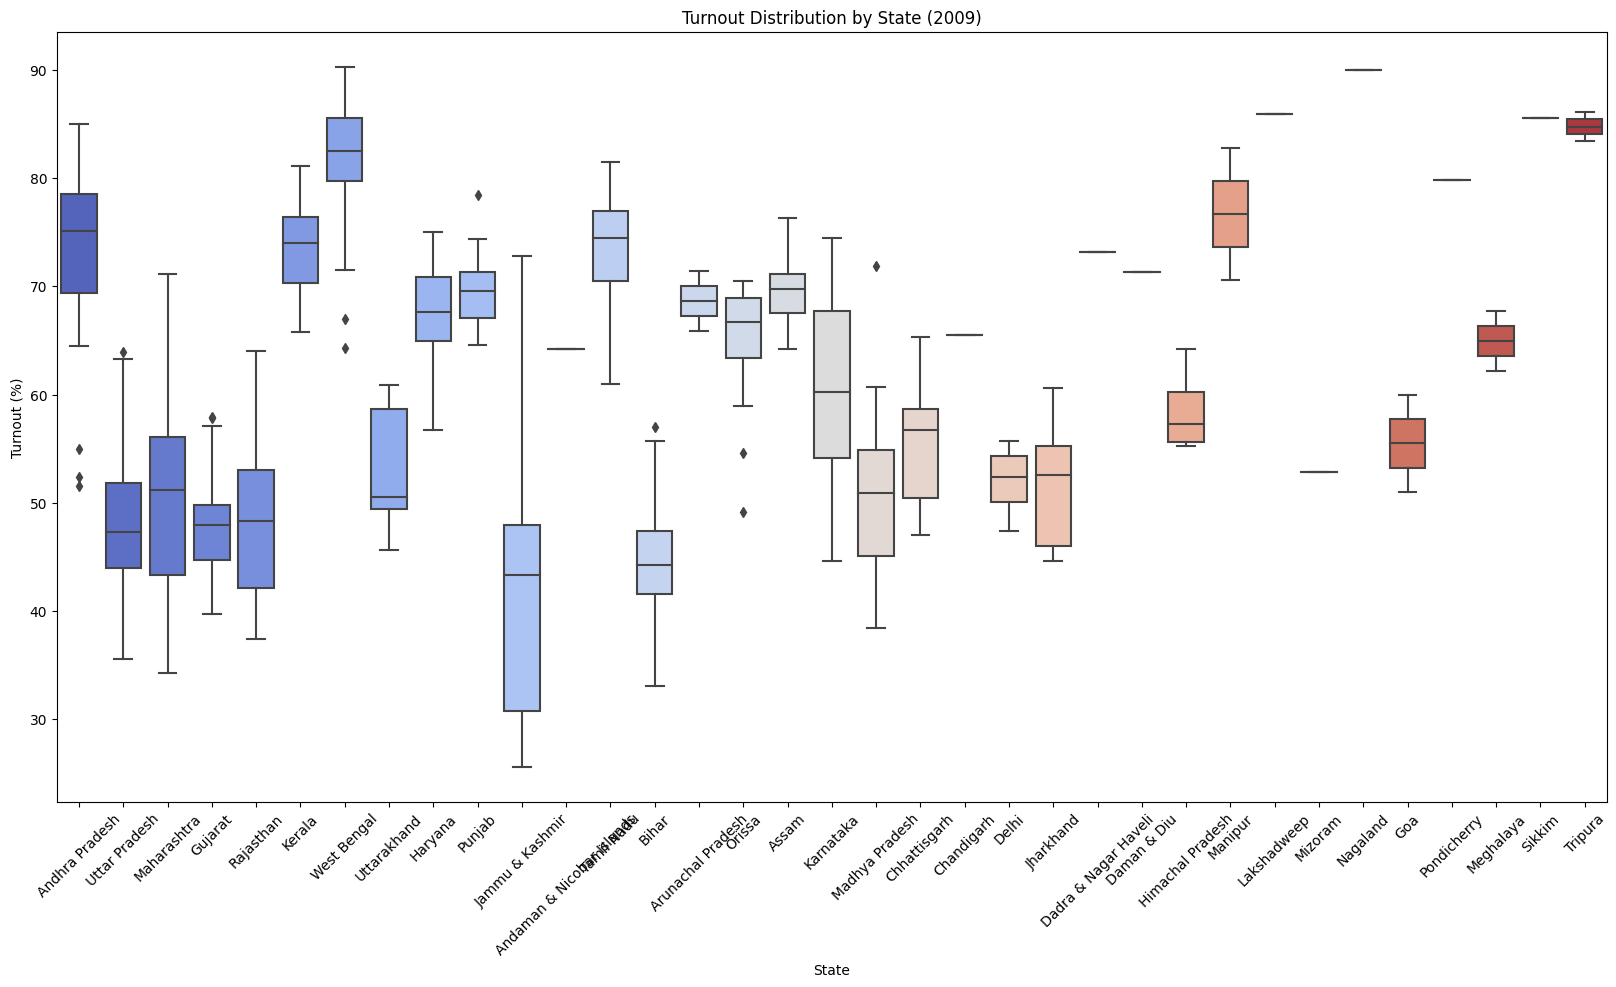

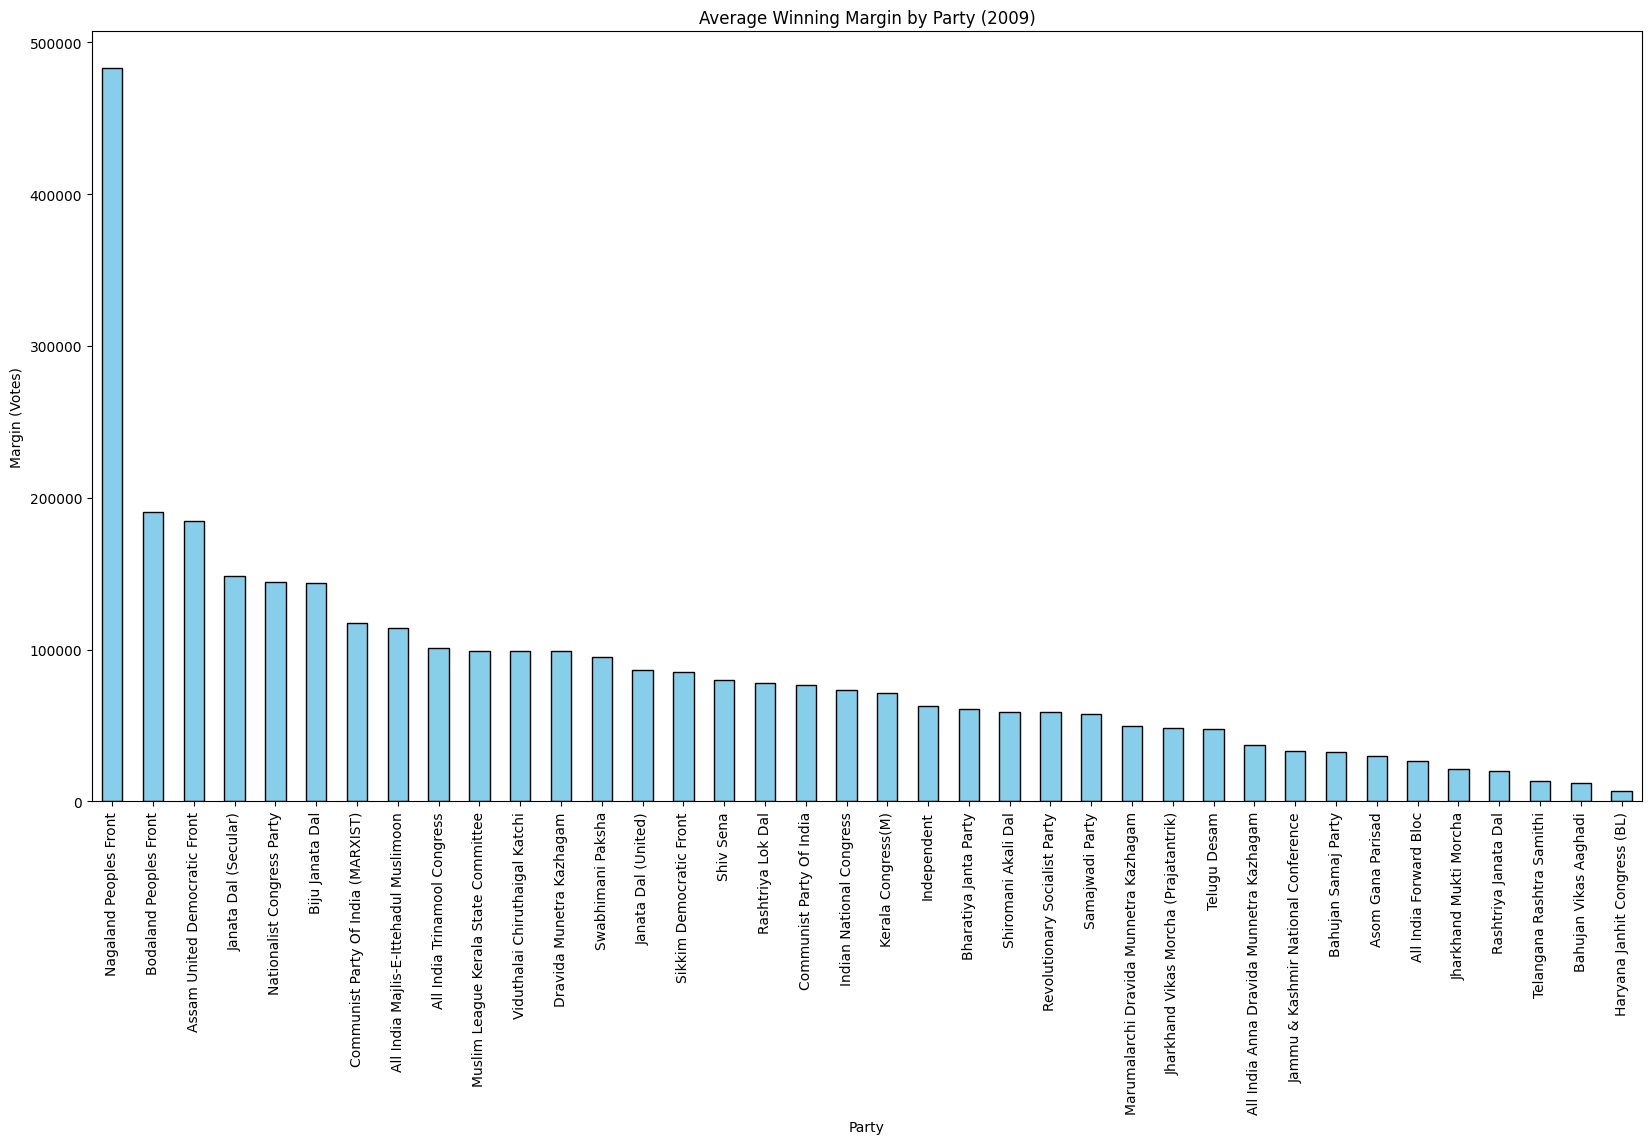

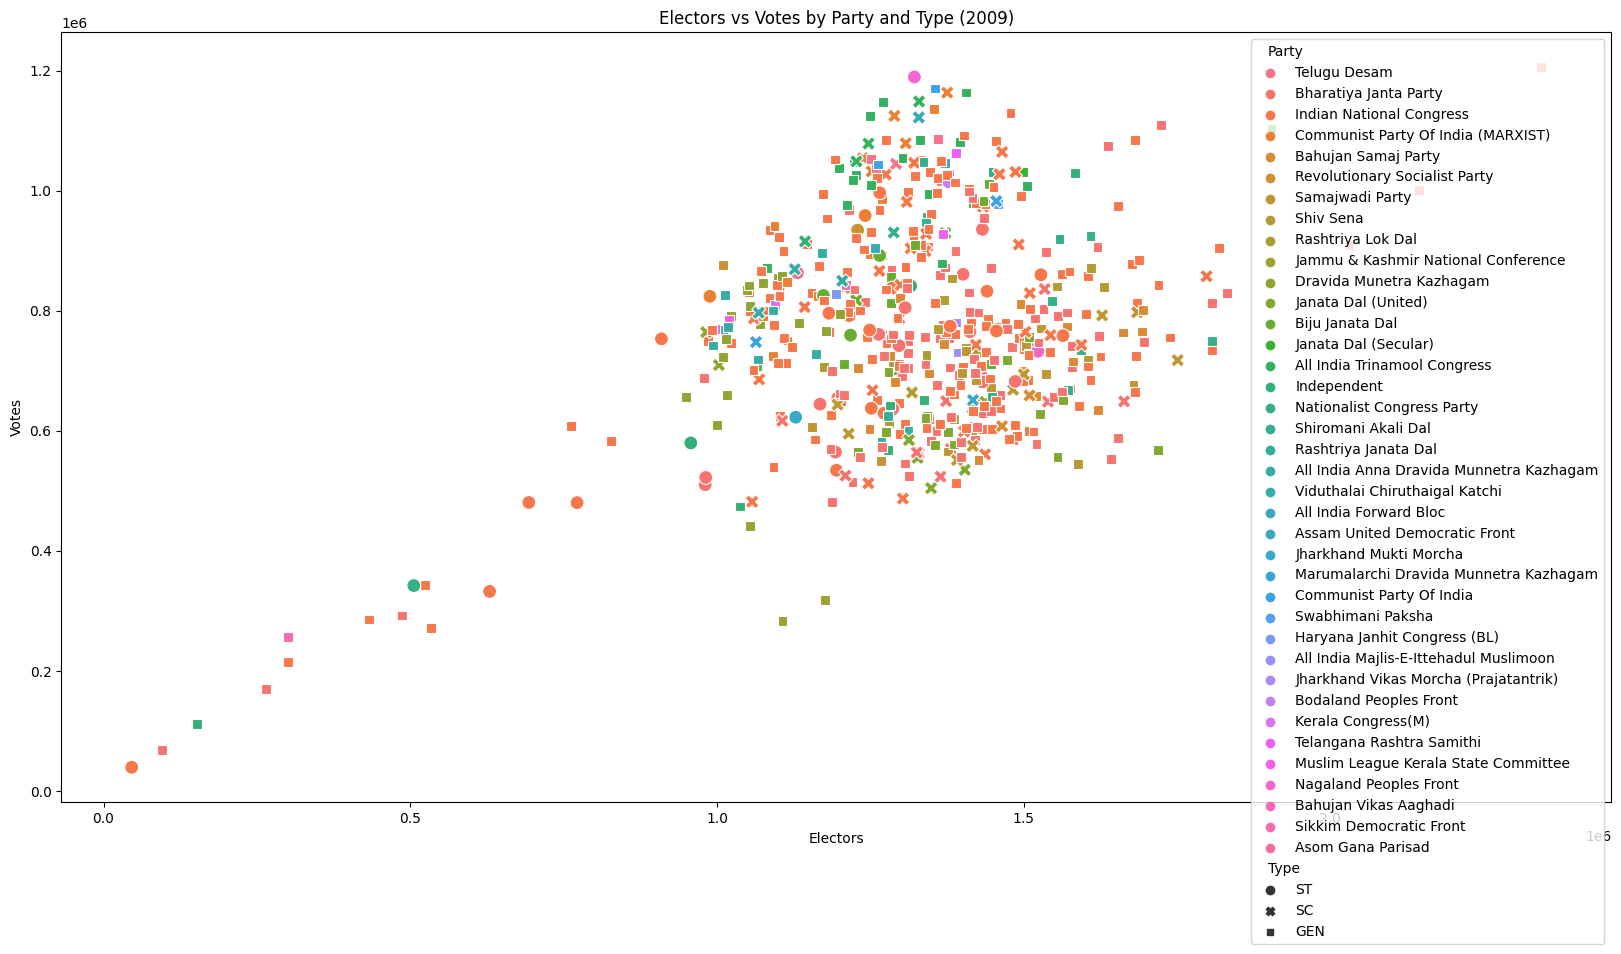

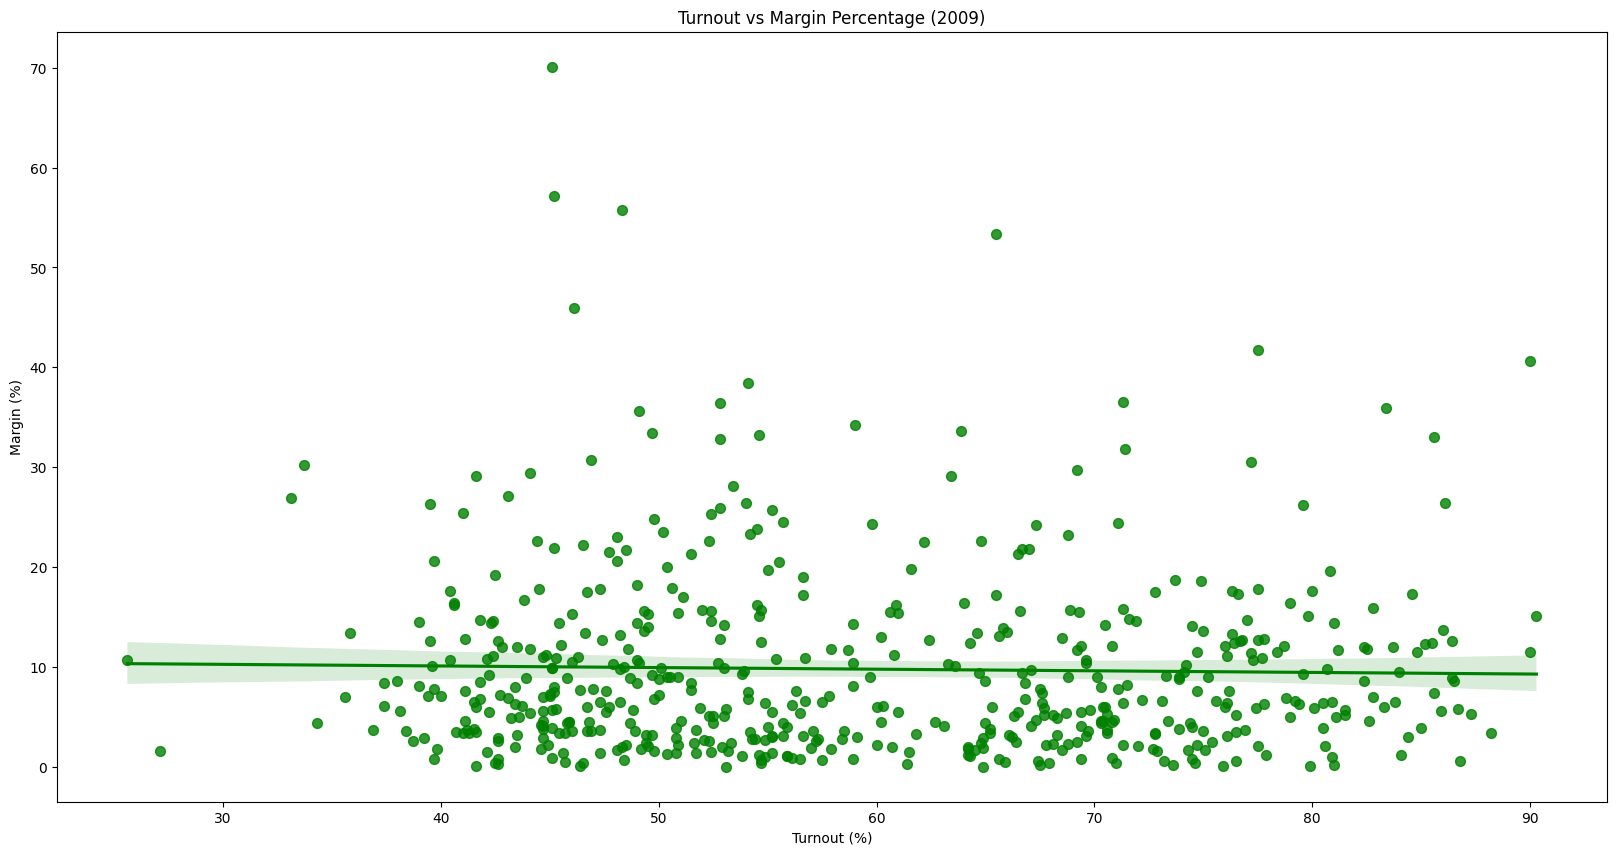

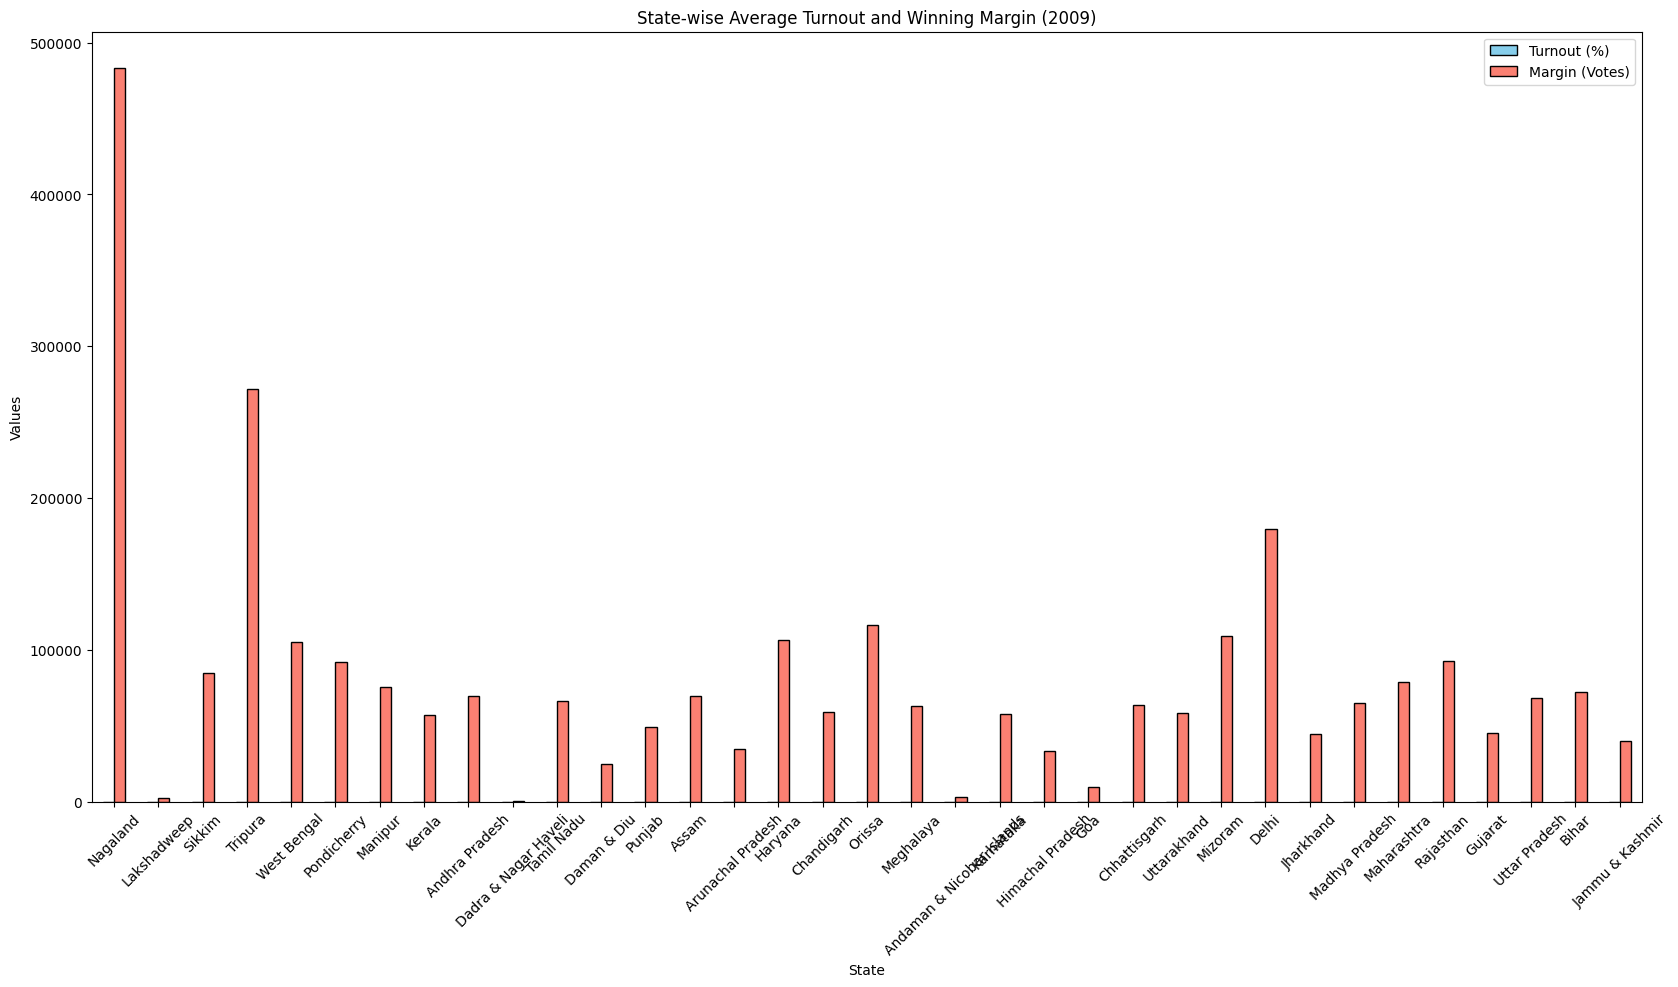

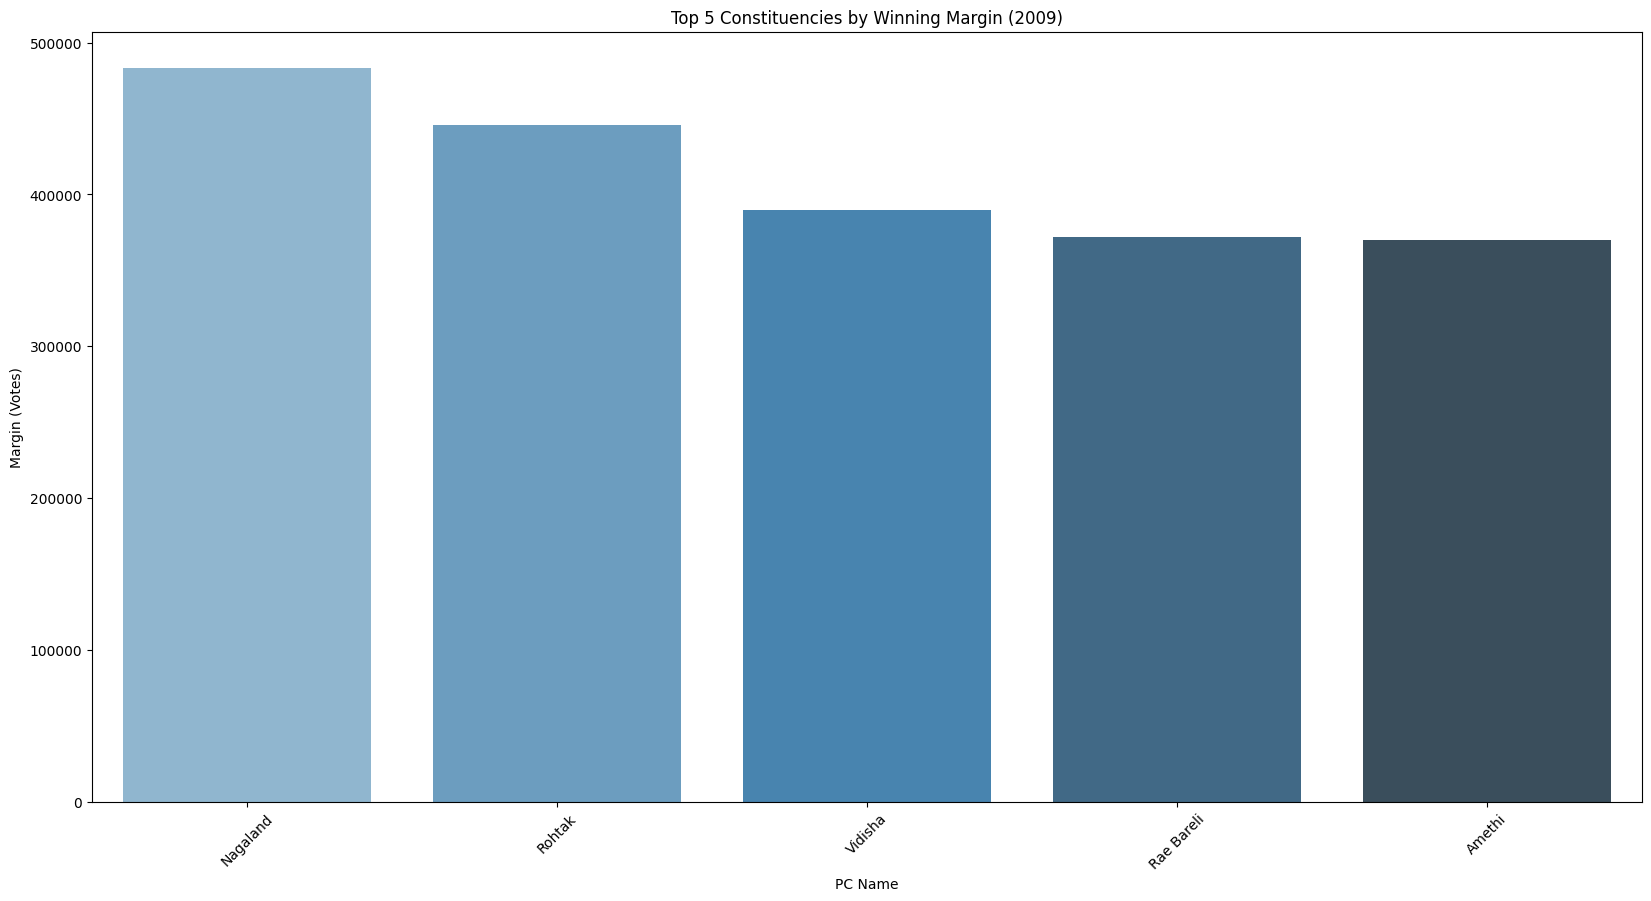

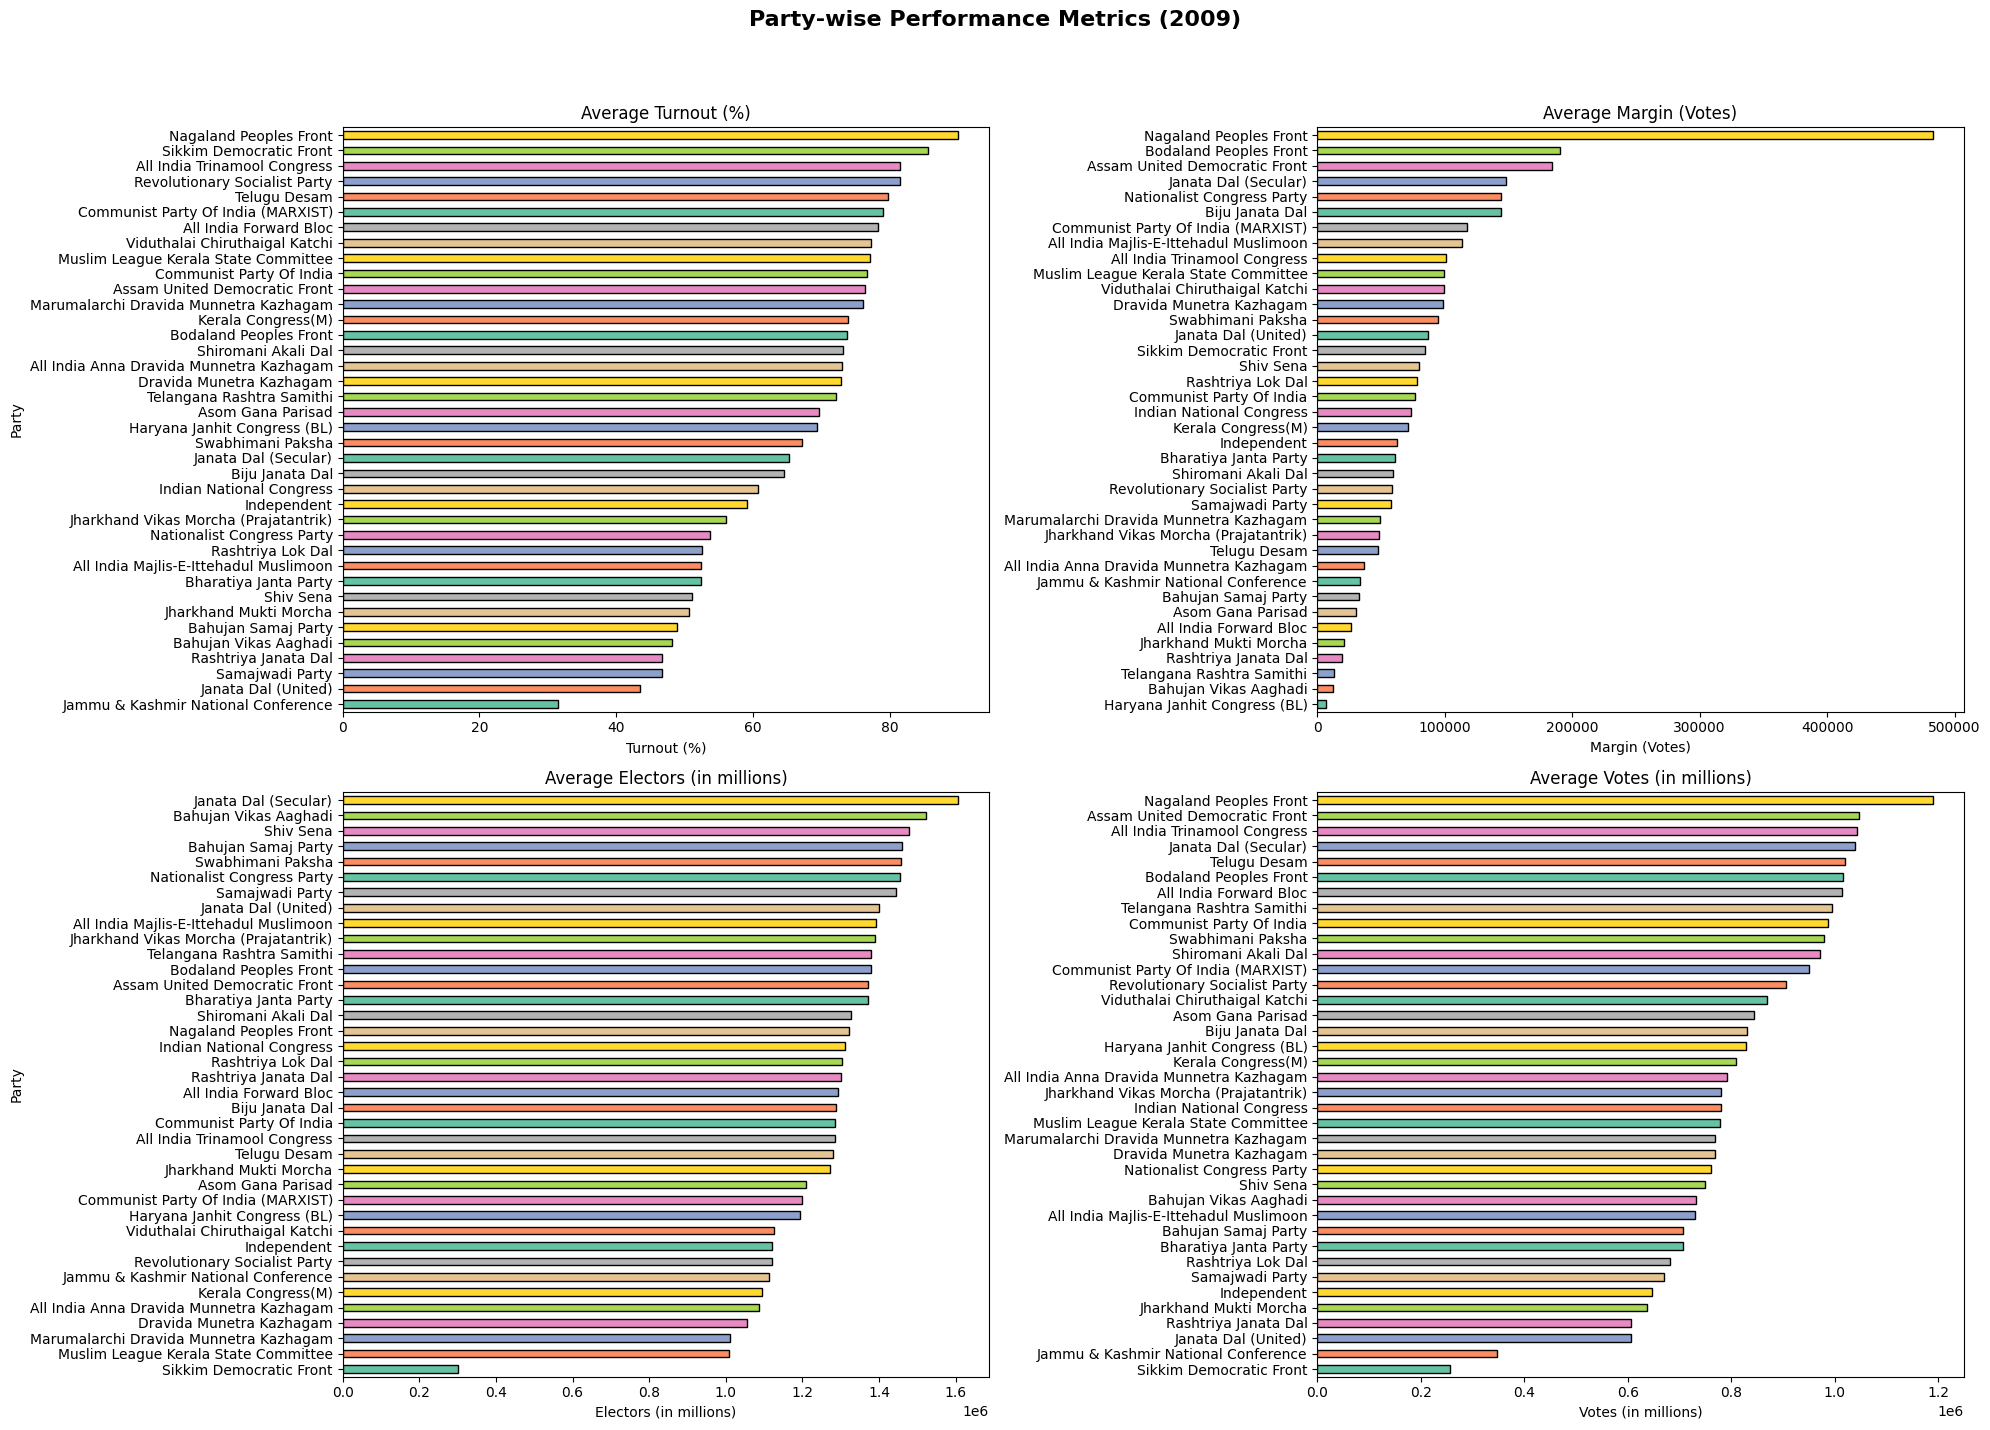

/tmp/ipykernel_17/3342779334.py:110: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_2009, x="Party", y="Vote % of Electors", estimator=np.mean, ci=None, palette="Set2")


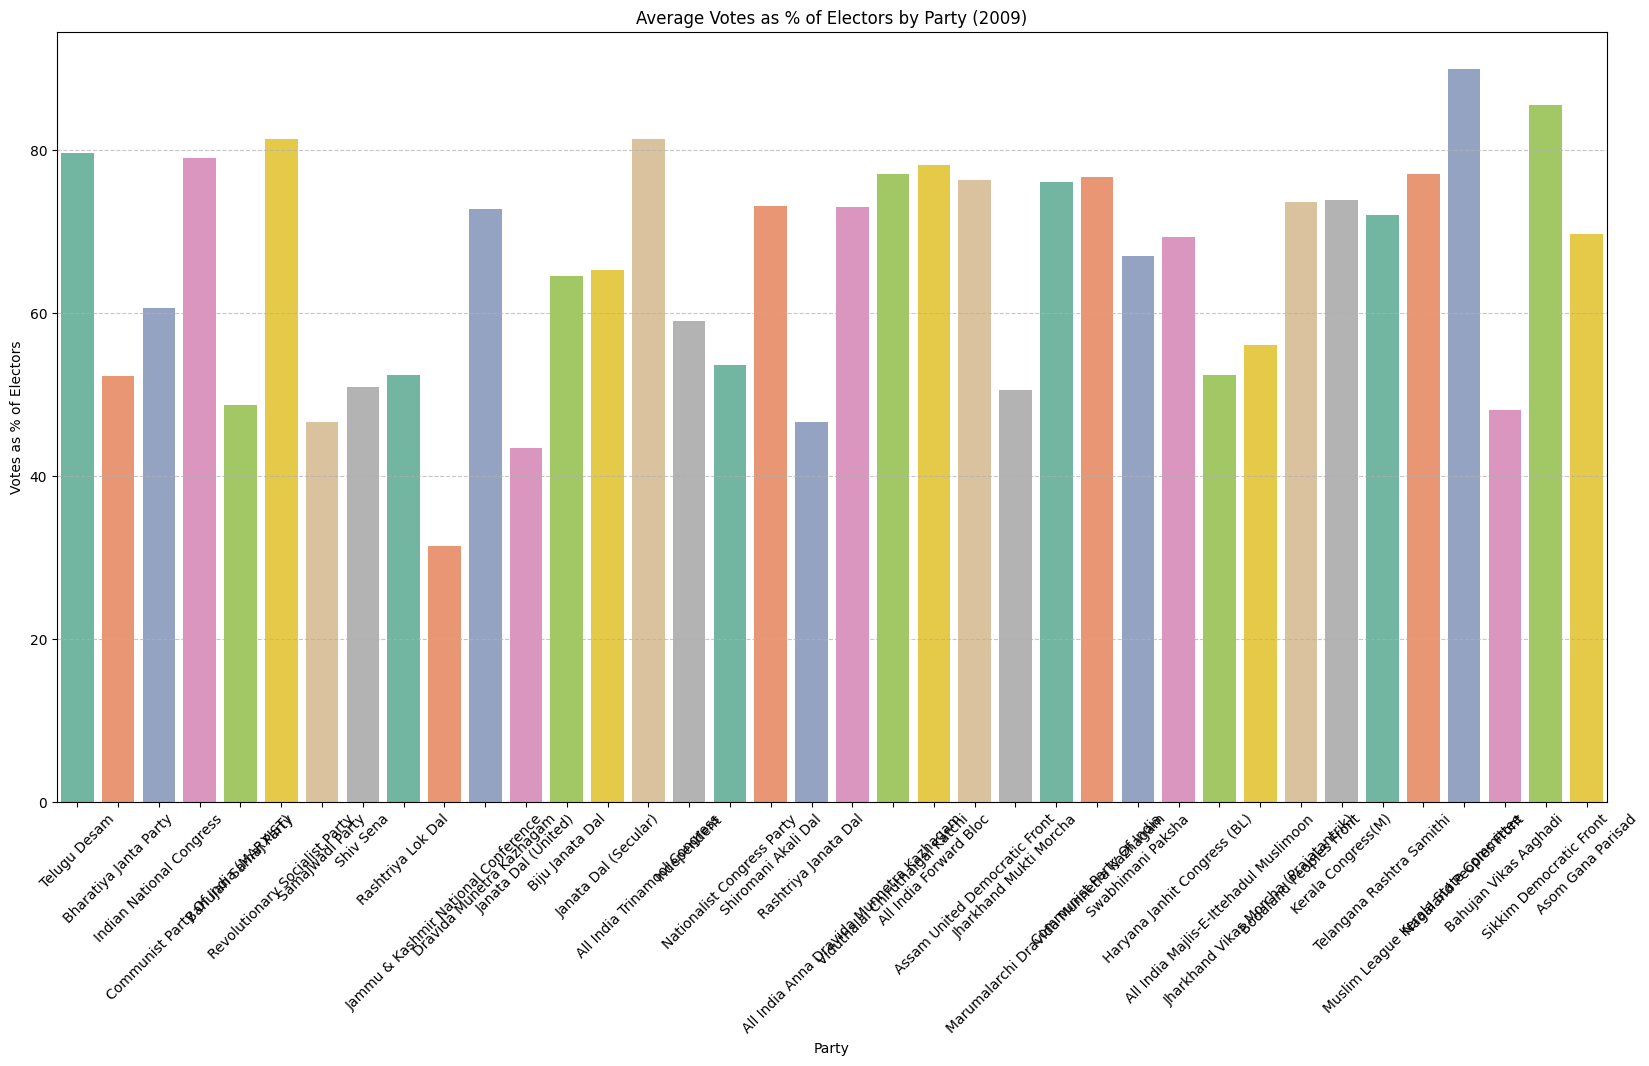

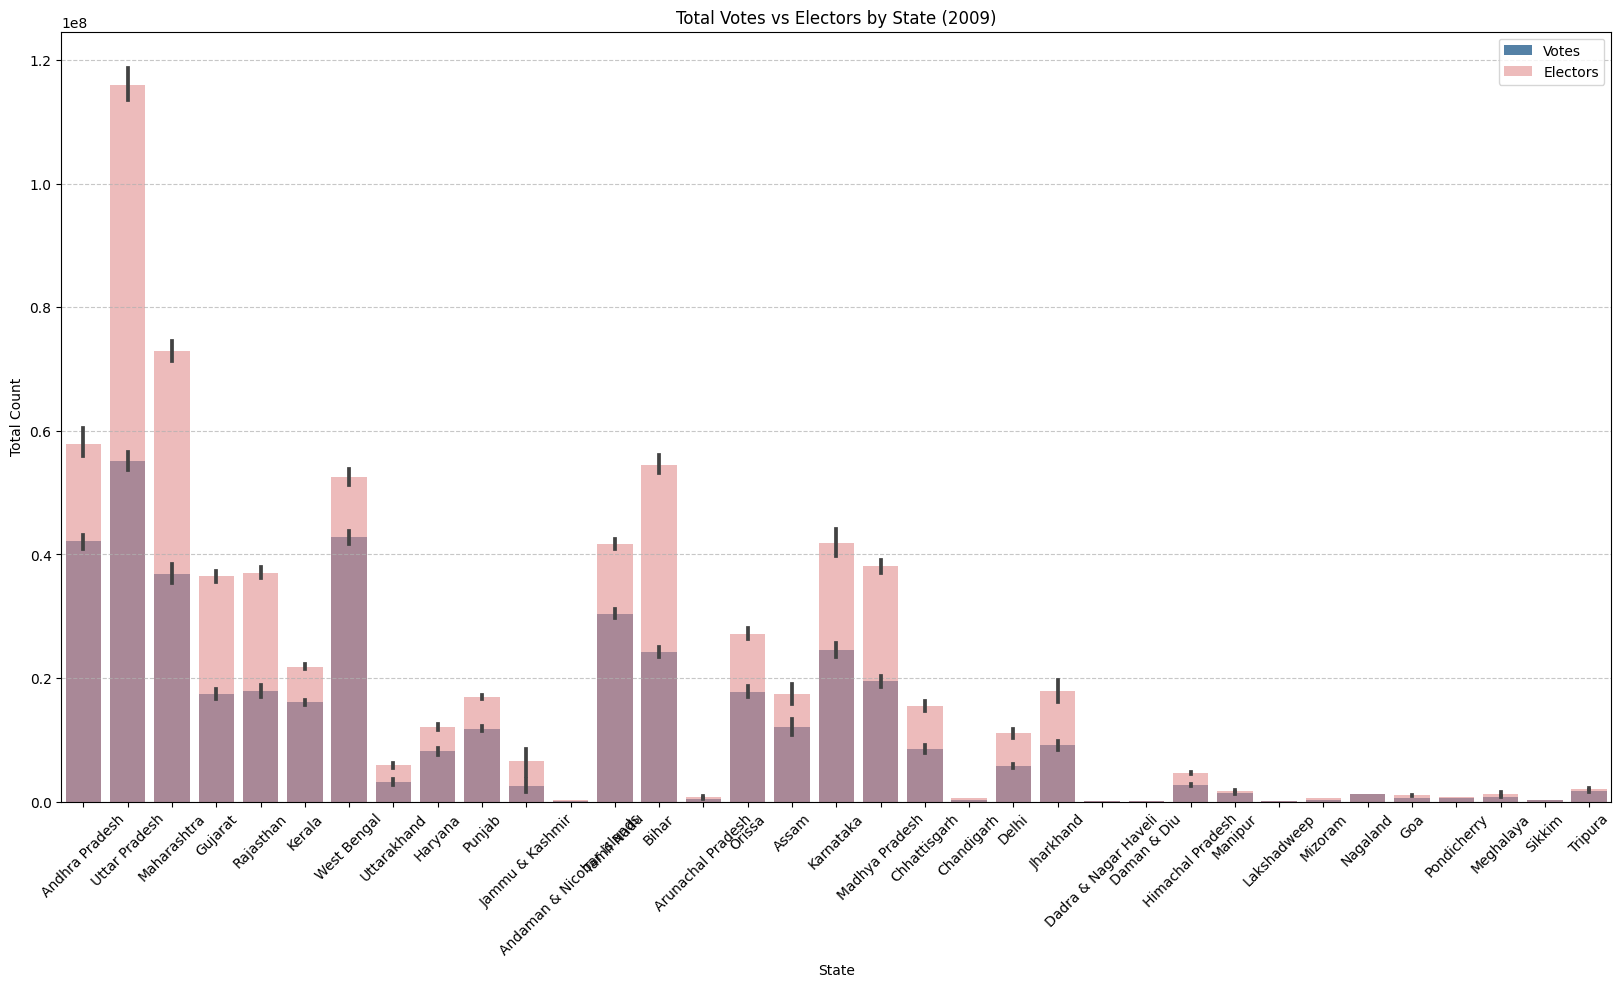

In [12]:
# Visualization 1
# Research question: What is the distribution of turnout across states in 2009?
# Boxplot of turnout distribution by state
plt.figure(figsize=(20, 10))
sns.boxplot(x="State", y="Turnout", data=df_2009, palette="coolwarm")
plt.title("Turnout Distribution by State (2009)")
plt.xticks(rotation=45)
plt.ylabel("Turnout (%)")
plt.xlabel("State")
plt.show()

# Visualization 2
# Research question: Which parties had the highest average winning margin in 2009?
# Barplot of average winning margin by party
top_parties = df_2009.groupby("Party")["Margin"].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
top_parties.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Winning Margin by Party (2009)")
plt.ylabel("Margin (Votes)")
plt.xlabel("Party")
plt.show()

# Visualization 3
# Research question: How are electors and votes related by party and type in 2009?
# Scatterplot of electors vs votes by party and type
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Electors", y="Votes", hue="Party", style="Type", data=df_2009, s=100)
plt.title("Electors vs Votes by Party and Type (2009)")
plt.xlabel("Electors")
plt.ylabel("Votes")
plt.show()

# Visualization 4
# Research question: Is there a relationship between turnout and margin percentage in 2009?
# Scatterplot with regression line for turnout vs margin percentage
plt.figure(figsize=(20, 10))
sns.regplot(x="Turnout", y="Margin %", data=df_2009, color="green", scatter_kws={"s": 50})
plt.title("Turnout vs Margin Percentage (2009)")
plt.xlabel("Turnout (%)")
plt.ylabel("Margin (%)")
plt.show()

# Visualization 5
# Research question: How do state-wise turnout and margin compare in 2009?
# Barplot of state-wise average turnout and winning margin
df_grouped_state = df_2009.groupby("State")[["Turnout", "Margin"]].mean().sort_values(by="Turnout", ascending=False)
df_grouped_state.plot(kind="bar", figsize=(20, 10), color=["skyblue", "salmon"], edgecolor="black")
plt.title("State-wise Average Turnout and Winning Margin (2009)")
plt.ylabel("Values")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.legend(["Turnout (%)", "Margin (Votes)"])
plt.show()

# Visualization 6
# Research question: Which constituencies had the highest winning margins in 2009?
# Barplot of top 5 constituencies by winning margin
top_5_margin = df_2009.nlargest(5, "Margin")
plt.figure(figsize=(20, 10))
sns.barplot(x="PC Name", y="Margin", data=top_5_margin, palette="Blues_d")
plt.title("Top 5 Constituencies by Winning Margin (2009)")
plt.ylabel("Margin (Votes)")
plt.xlabel("PC Name")
plt.xticks(rotation=45)
plt.show()

# Visualization 7
# Research question: How do parties perform in terms of turnout, margin percentage, electors, and votes in 2009?
# Party-wise performance metrics (turnout, margin %, electors, votes)

# We should group by 'Party' and calculate the mean for the relevant columns
party_performance = df_2009.groupby("Party")[["Turnout", "Margin", "Electors", "Votes"]].mean()

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("Party-wise Performance Metrics (2009)", fontsize=16, weight='bold')
colors = sns.color_palette("Set2", len(party_performance))

# Turnout
party_performance["Turnout"].sort_values().plot(kind="barh", ax=axes[0, 0], color=colors, edgecolor="black")
axes[0, 0].set_title("Average Turnout (%)")
axes[0, 0].set_xlabel("Turnout (%)")
axes[0, 0].set_ylabel("Party")

# Margin %
party_performance["Margin"].sort_values().plot(kind="barh", ax=axes[0, 1], color=colors, edgecolor="black")
axes[0, 1].set_title("Average Margin (Votes)")
axes[0, 1].set_xlabel("Margin (Votes)")
axes[0, 1].set_ylabel("")

# Electors
party_performance["Electors"].sort_values().plot(kind="barh", ax=axes[1, 0], color=colors, edgecolor="black")
axes[1, 0].set_title("Average Electors (in millions)")
axes[1, 0].set_xlabel("Electors (in millions)")
axes[1, 0].set_ylabel("Party")

# Votes
party_performance["Votes"].sort_values().plot(kind="barh", ax=axes[1, 1], color=colors, edgecolor="black")
axes[1, 1].set_title("Average Votes (in millions)")
axes[1, 1].set_xlabel("Votes (in millions)")
axes[1, 1].set_ylabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Visualization 8
# Research question: How efficiently did parties convert electors into votes in 2009?
# Barplot of average votes as % of electors by party
df_2009["Vote % of Electors"] = (df_2009["Votes"] / df_2009["Electors"]) * 100
plt.figure(figsize=(20, 10))
sns.barplot(data=df_2009, x="Party", y="Vote % of Electors", estimator=np.mean, ci=None, palette="Set2")
plt.title("Average Votes as % of Electors by Party (2009)")
plt.ylabel("Votes as % of Electors")
plt.xlabel("Party")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization 9
# Research question: How are voting patterns spread across states in 2009?
# Barplot of total votes vs electors by state
plt.figure(figsize=(20, 10))
sns.barplot(data=df_2009, x="State", y="Votes", estimator=np.sum, color="steelblue", label="Votes")
sns.barplot(data=df_2009, x="State", y="Electors", estimator=np.sum, color="lightcoral", alpha=0.6, label="Electors")
plt.title("Total Votes vs Electors by State (2009)")
plt.ylabel("Total Count")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Data vis: 2014

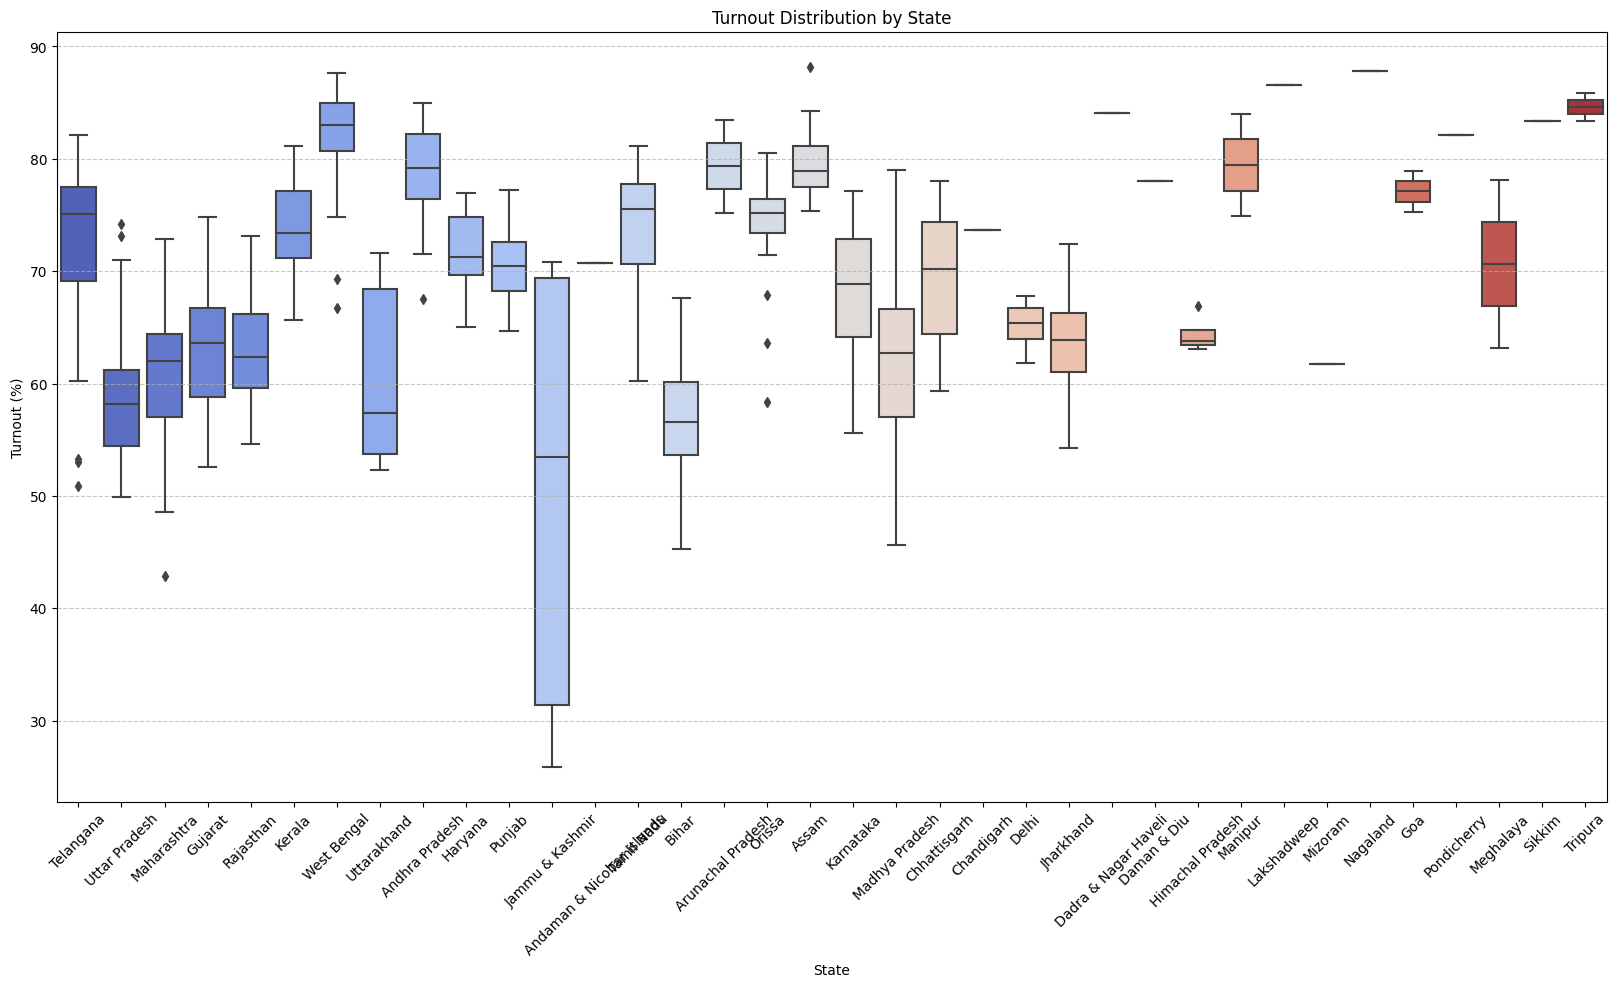

In [13]:
# research question: how is the turnout distributed across states?
# boxplot of turnout distribution by state
plt.figure(figsize=(20, 10))
sns.boxplot(x="State", y="Turnout", data=df_2014, palette="coolwarm")
plt.title("Turnout Distribution by State")
plt.xticks(rotation=45)
plt.ylabel("Turnout (%)")
plt.xlabel("State")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

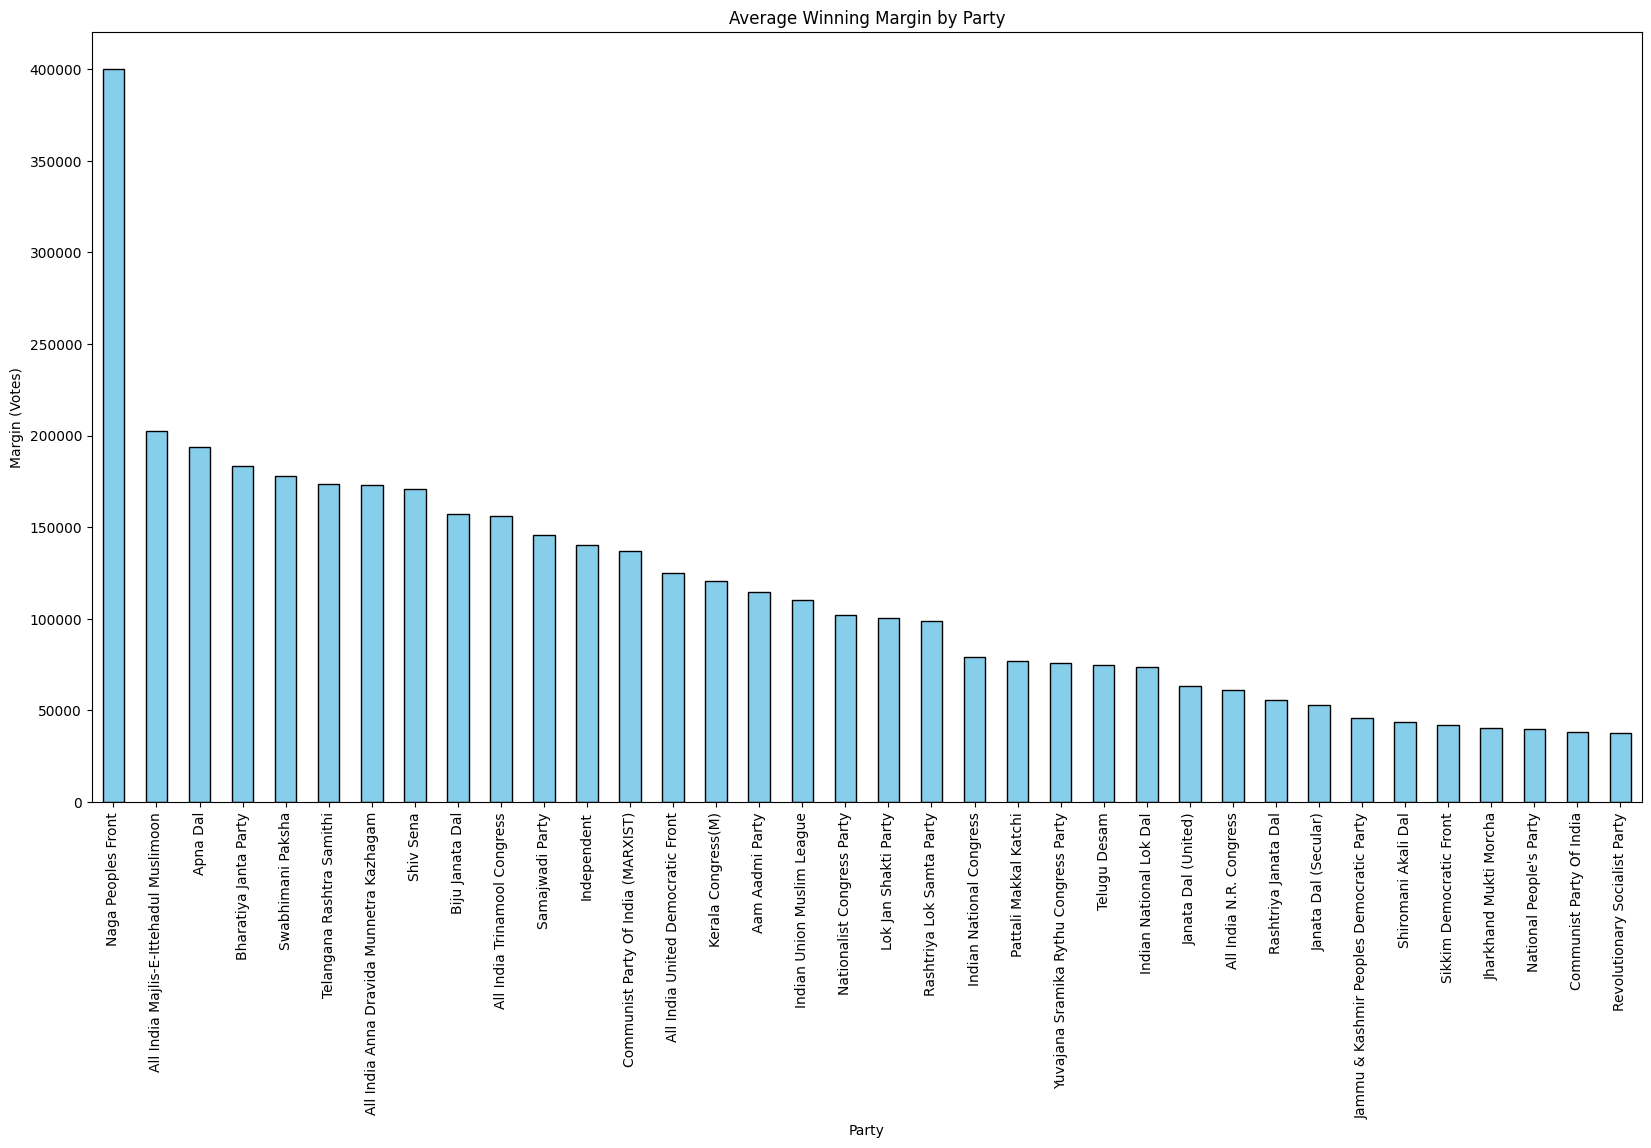

In [14]:
# research question: what are the average winning margins for each party?
# barplot of average winning margin by party
top_parties = df_2014.groupby("Party")["Margin"].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
top_parties.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Winning Margin by Party")
plt.ylabel("Margin (Votes)")
plt.xlabel("Party")
plt.show()

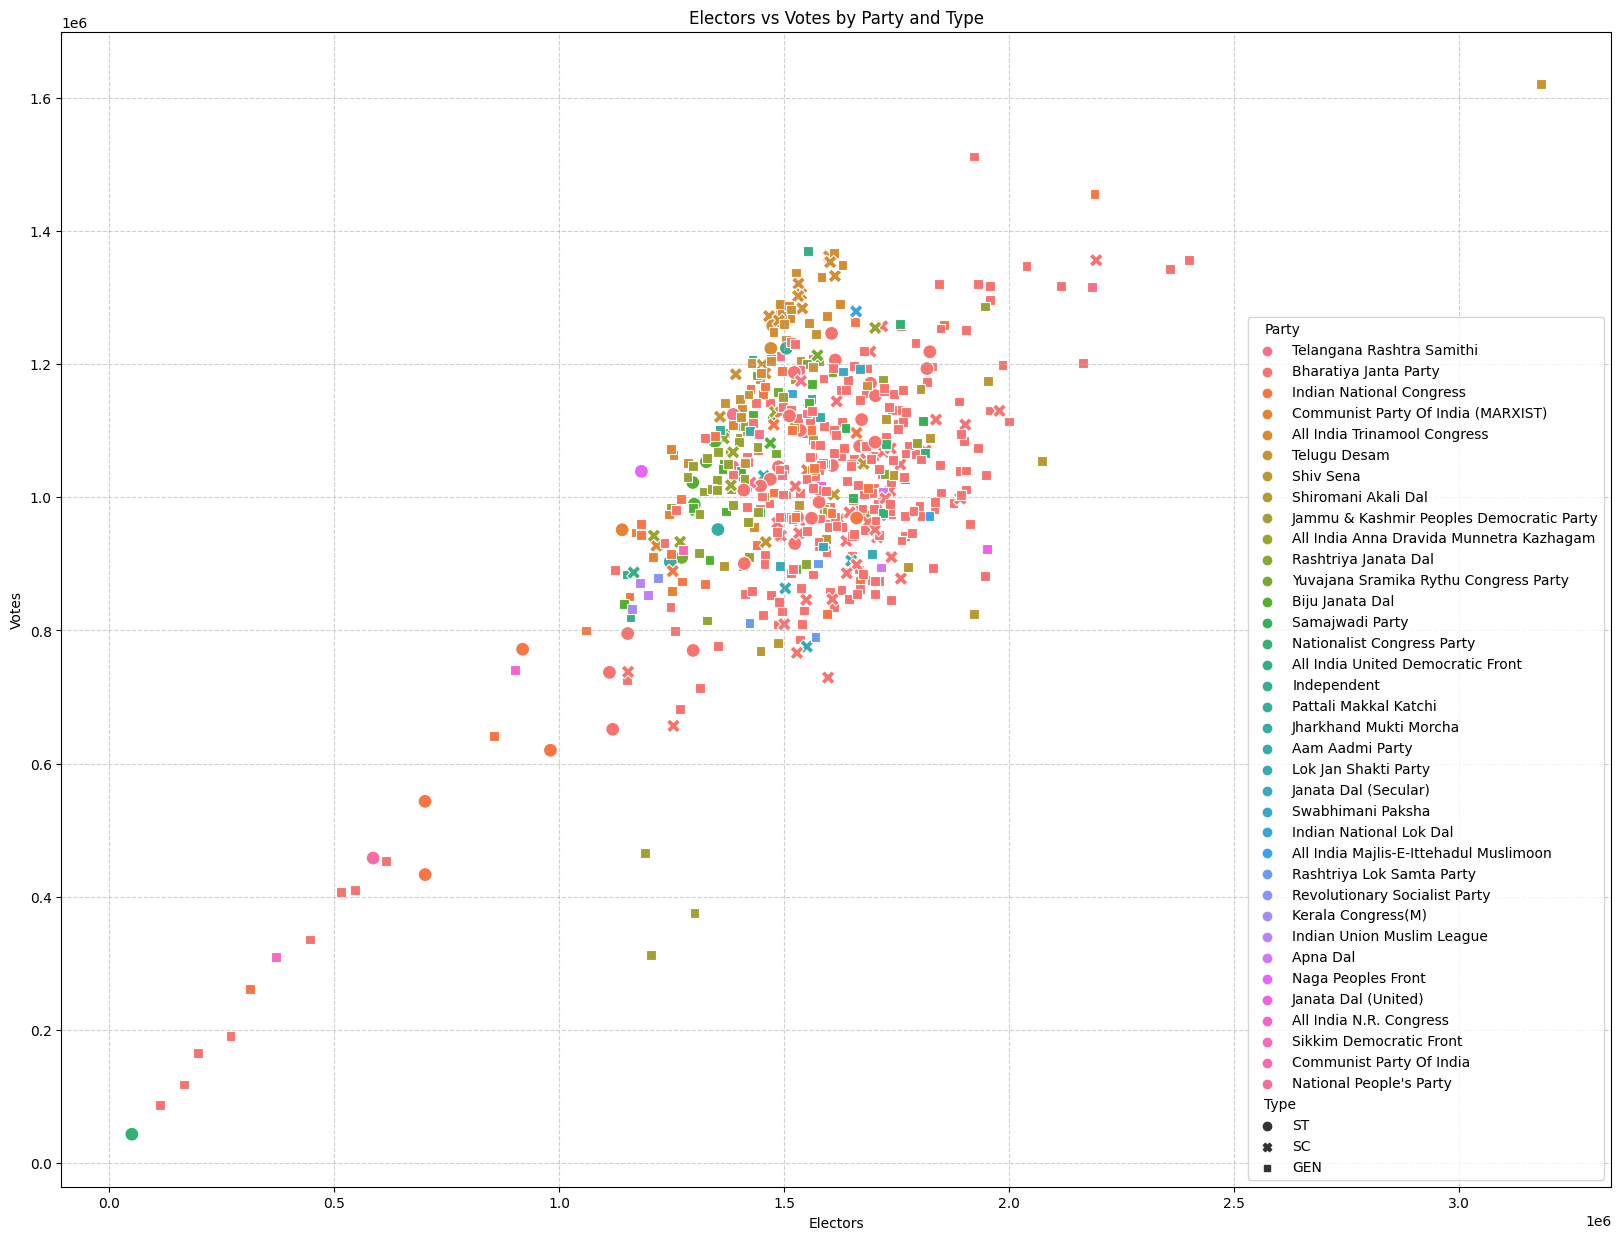

In [15]:
# research question: how are electors and votes distributed across constituencies?
# scatterplot of electors vs votes by party and type
plt.figure(figsize=(20, 15))
sns.scatterplot(
    x="Electors", y="Votes", hue="Party", style="Type", data=df_2014, s=100
)
plt.title("Electors vs Votes by Party and Type")
plt.xlabel("Electors")
plt.ylabel("Votes")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

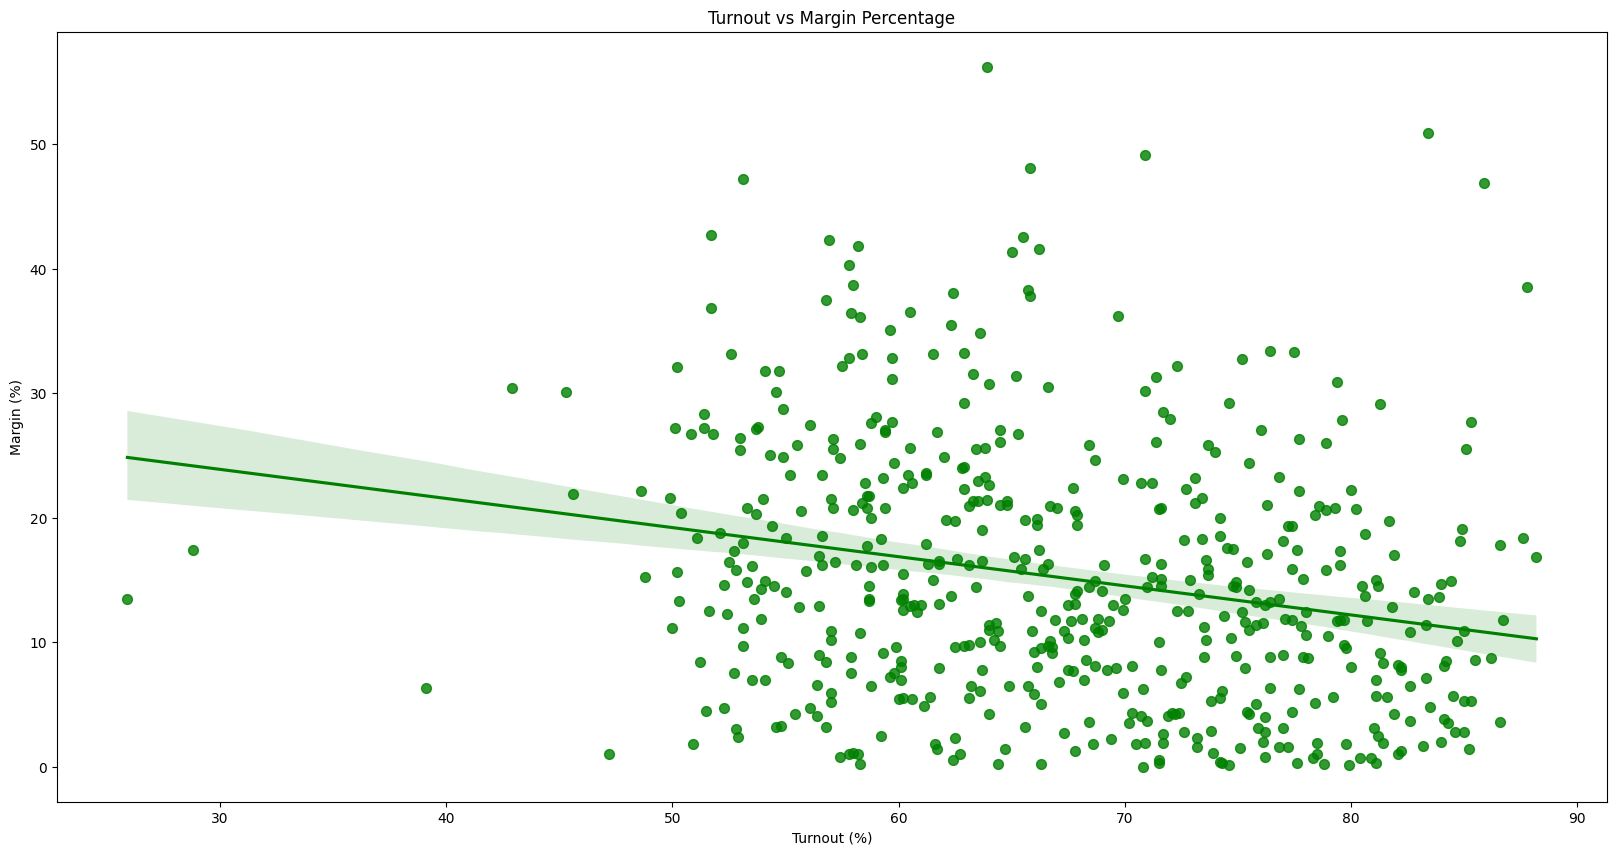

In [16]:
# research question: is there a relationship between turnout and margin percentage?
# scatterplot with regression line of turnout vs margin percentage
plt.figure(figsize=(20, 10))
sns.regplot(
    x="Turnout", y="Margin %", data=df_2014, color="green", scatter_kws={"s": 50}
)
plt.title("Turnout vs Margin Percentage")
plt.xlabel("Turnout (%)")
plt.ylabel("Margin (%)")
plt.show()

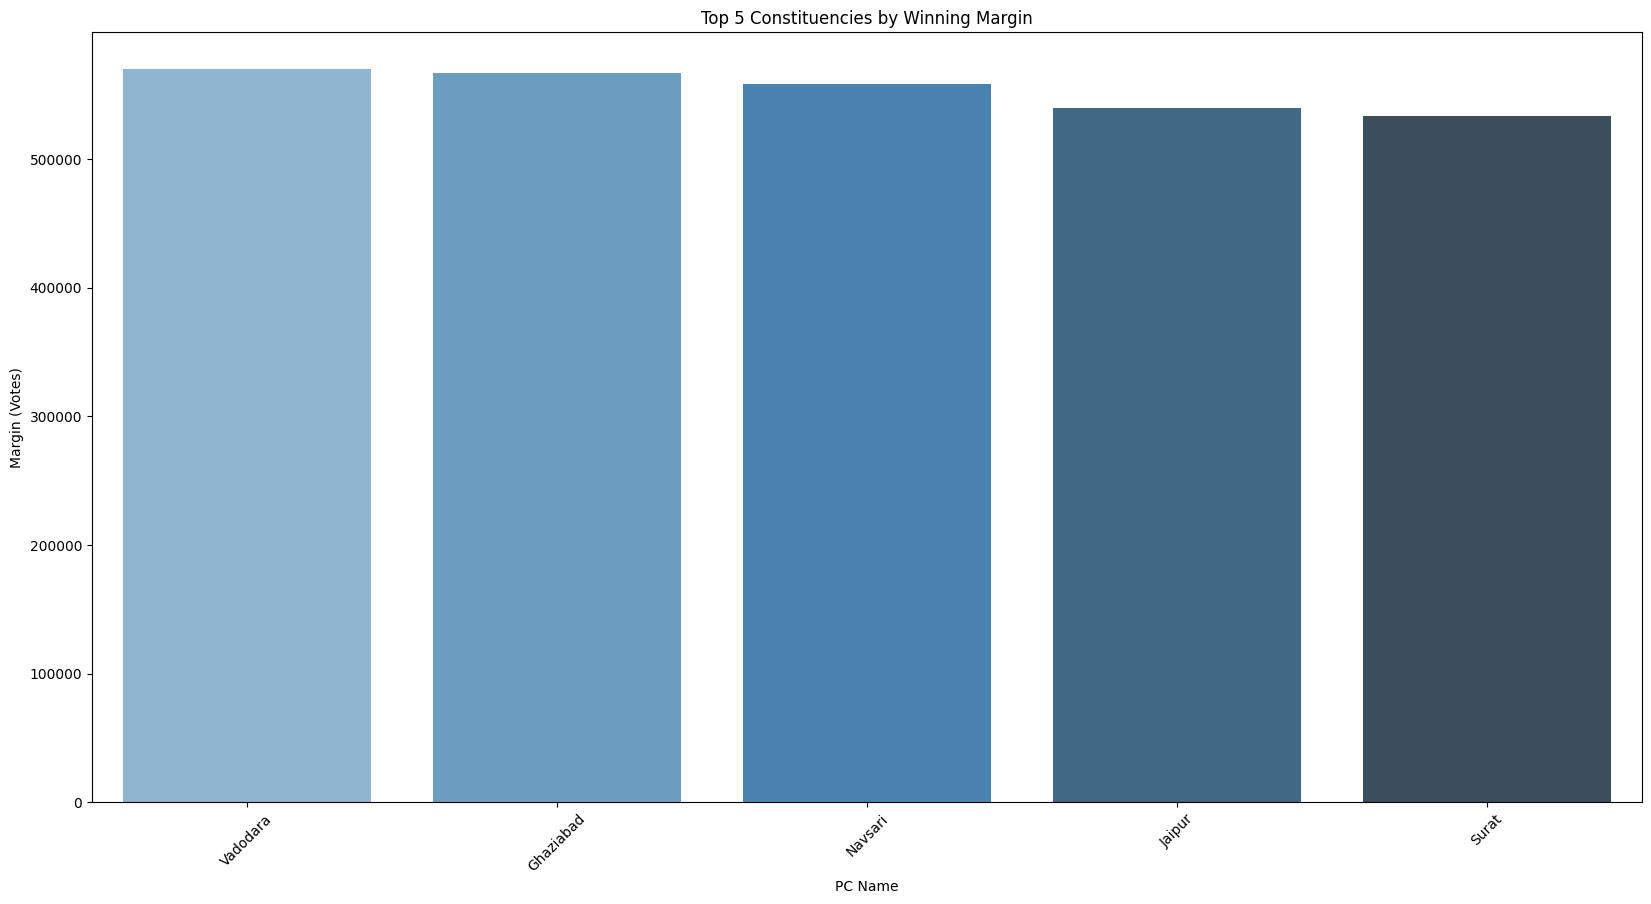

In [17]:
# research question: which constituencies had the highest winning margins?
# barplot of top 5 constituencies by winning margin
top_5_margin = df_2014.nlargest(5, "Margin")
plt.figure(figsize=(20, 10))
sns.barplot(x="PC Name", y="Margin", data=top_5_margin, palette="Blues_d")
plt.title("Top 5 Constituencies by Winning Margin")
plt.ylabel("Margin (Votes)")
plt.xlabel("PC Name")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_17/293444082.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


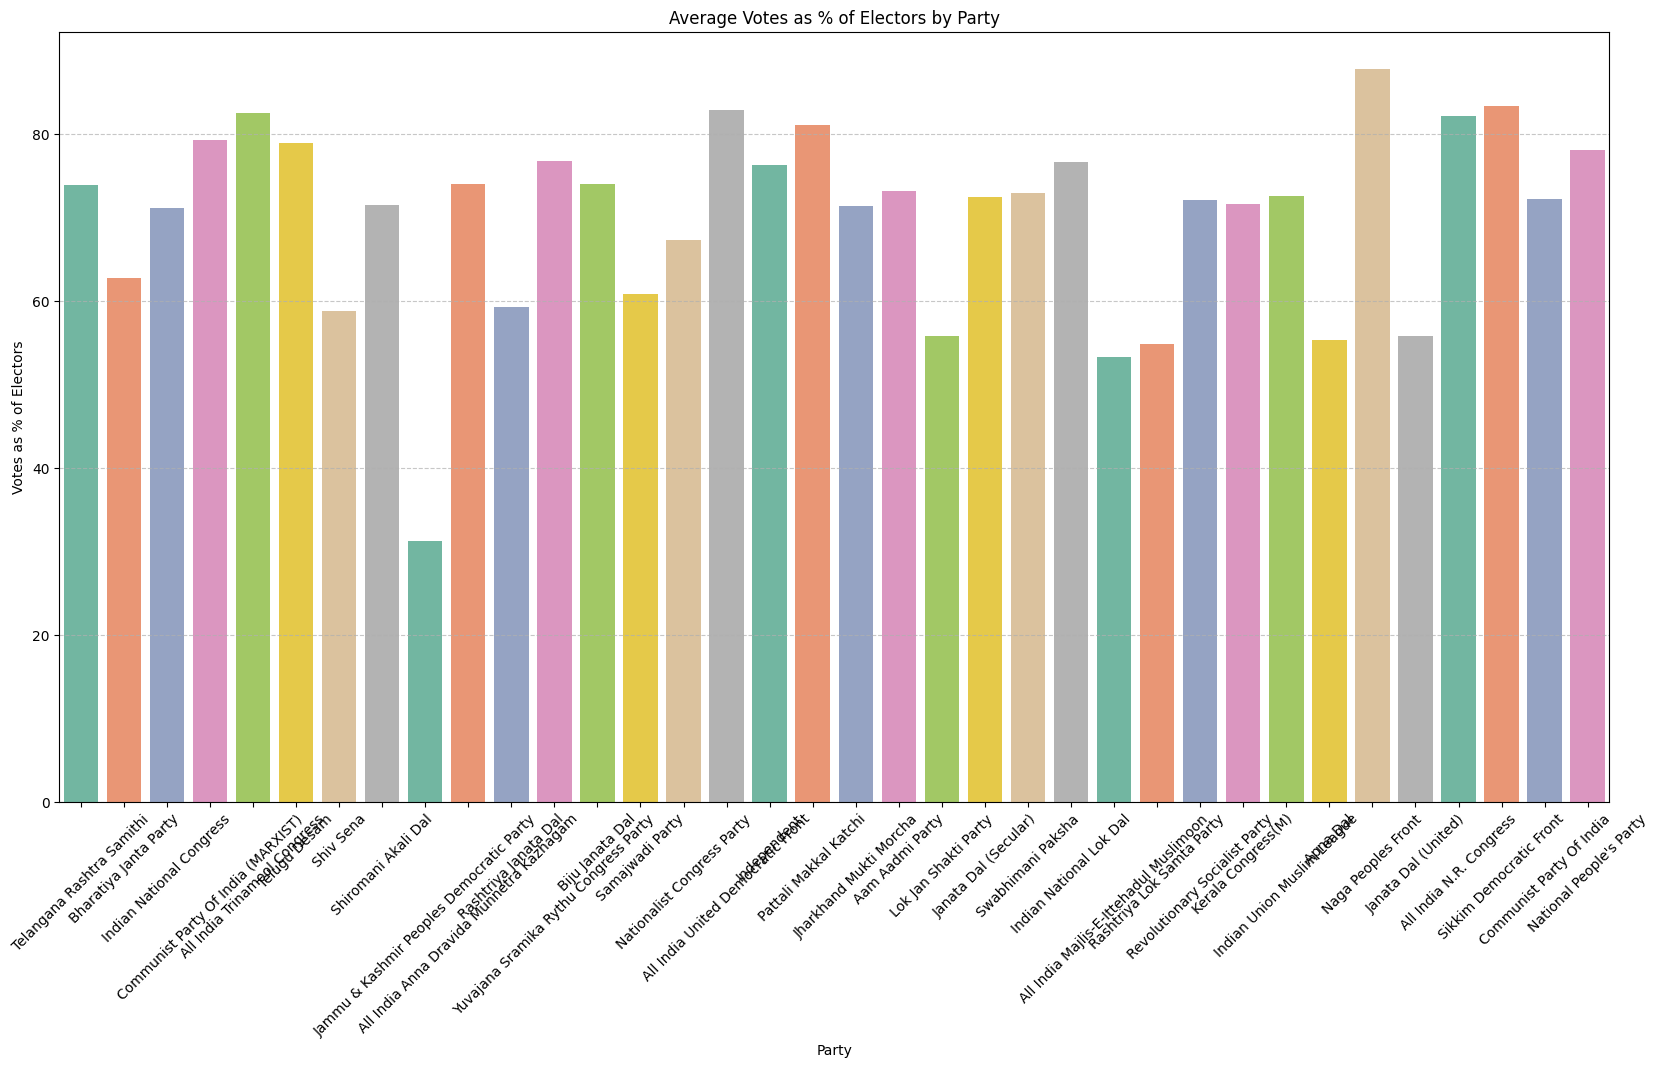

In [18]:
# research question: how efficiently did parties convert electors into votes?
# barplot of average votes as a percentage of electors by party
df_2014["Vote % of Electors"] = (df_2014["Votes"] / df_2014["Electors"]) * 100
plt.figure(figsize=(20, 10))
sns.barplot(
    x="Party",
    y="Vote % of Electors",
    data=df_2014,
    estimator=np.mean,
    ci=None,
    palette="Set2",
)
plt.title("Average Votes as % of Electors by Party")
plt.ylabel("Votes as % of Electors")
plt.xlabel("Party")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

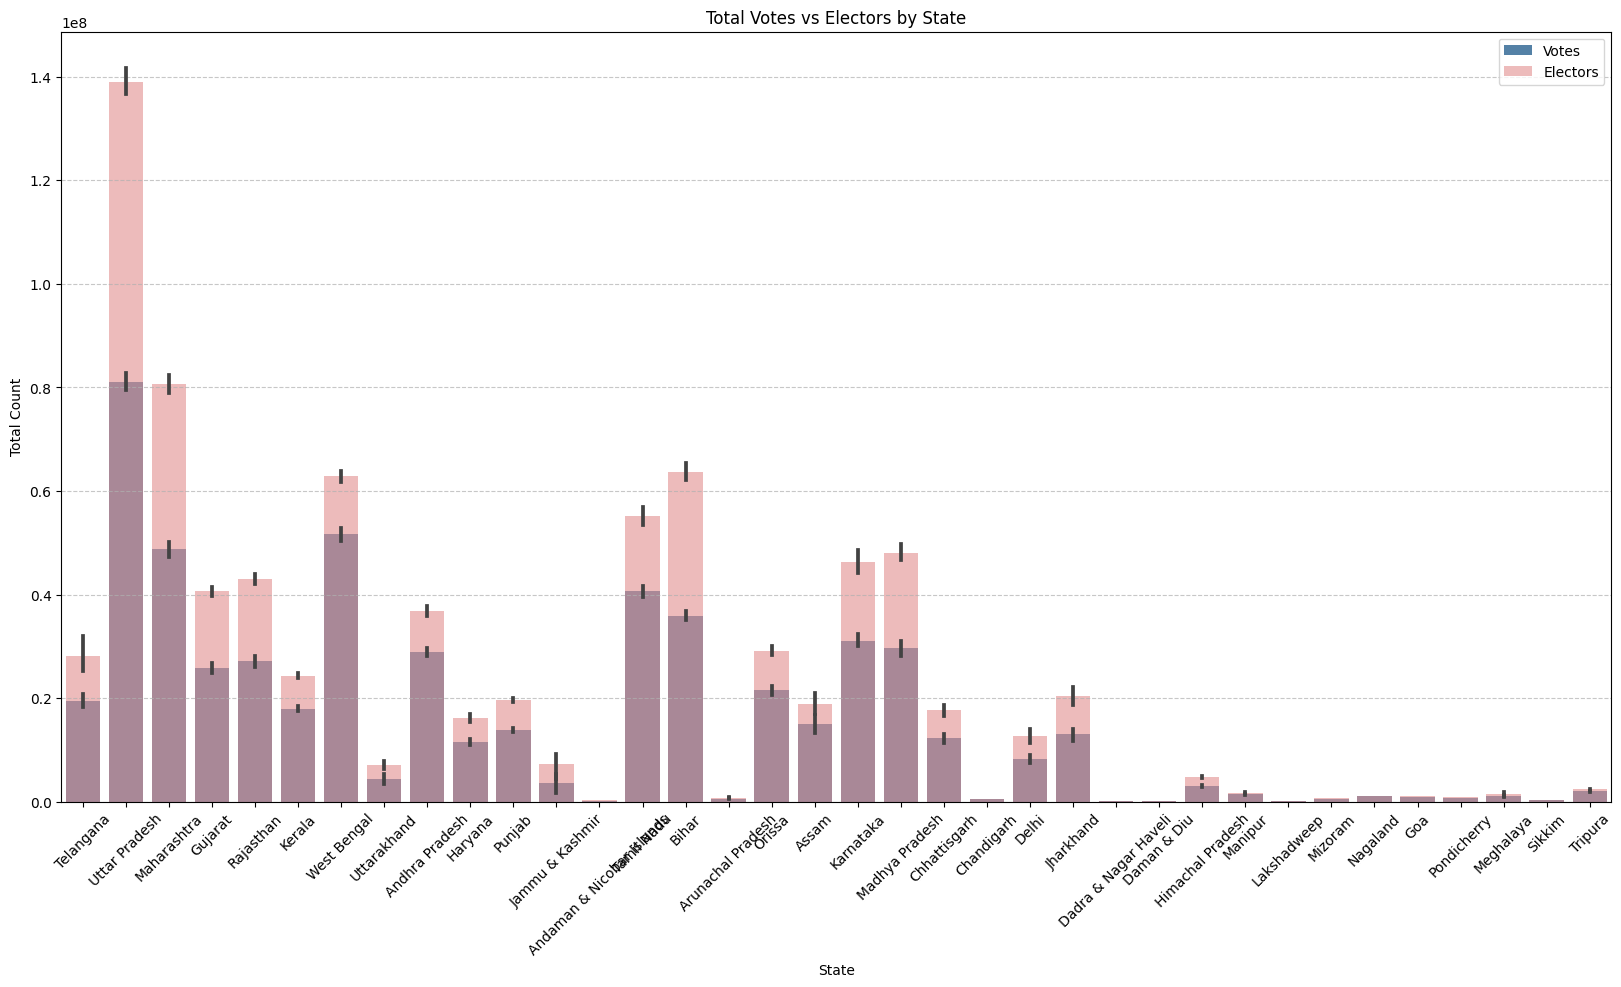

In [19]:
# research question: how do voting patterns differ across states?
# barplot of total votes vs electors by state
plt.figure(figsize=(20, 10))
sns.barplot(
    x="State",
    y="Votes",
    estimator=np.sum,
    color="steelblue",
    label="Votes",
    data=df_2014,
)
sns.barplot(
    x="State",
    y="Electors",
    estimator=np.sum,
    color="lightcoral",
    alpha=0.6,
    label="Electors",
    data=df_2014,
)
plt.title("Total Votes vs Electors by State")
plt.ylabel("Total Count")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_17/1213500341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2014["Turnout"], shade=True, color="blue", label="Turnout (%)")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_17/1213500341.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2014["Margin %"], shade=True, color="red", label="Margin (%)")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

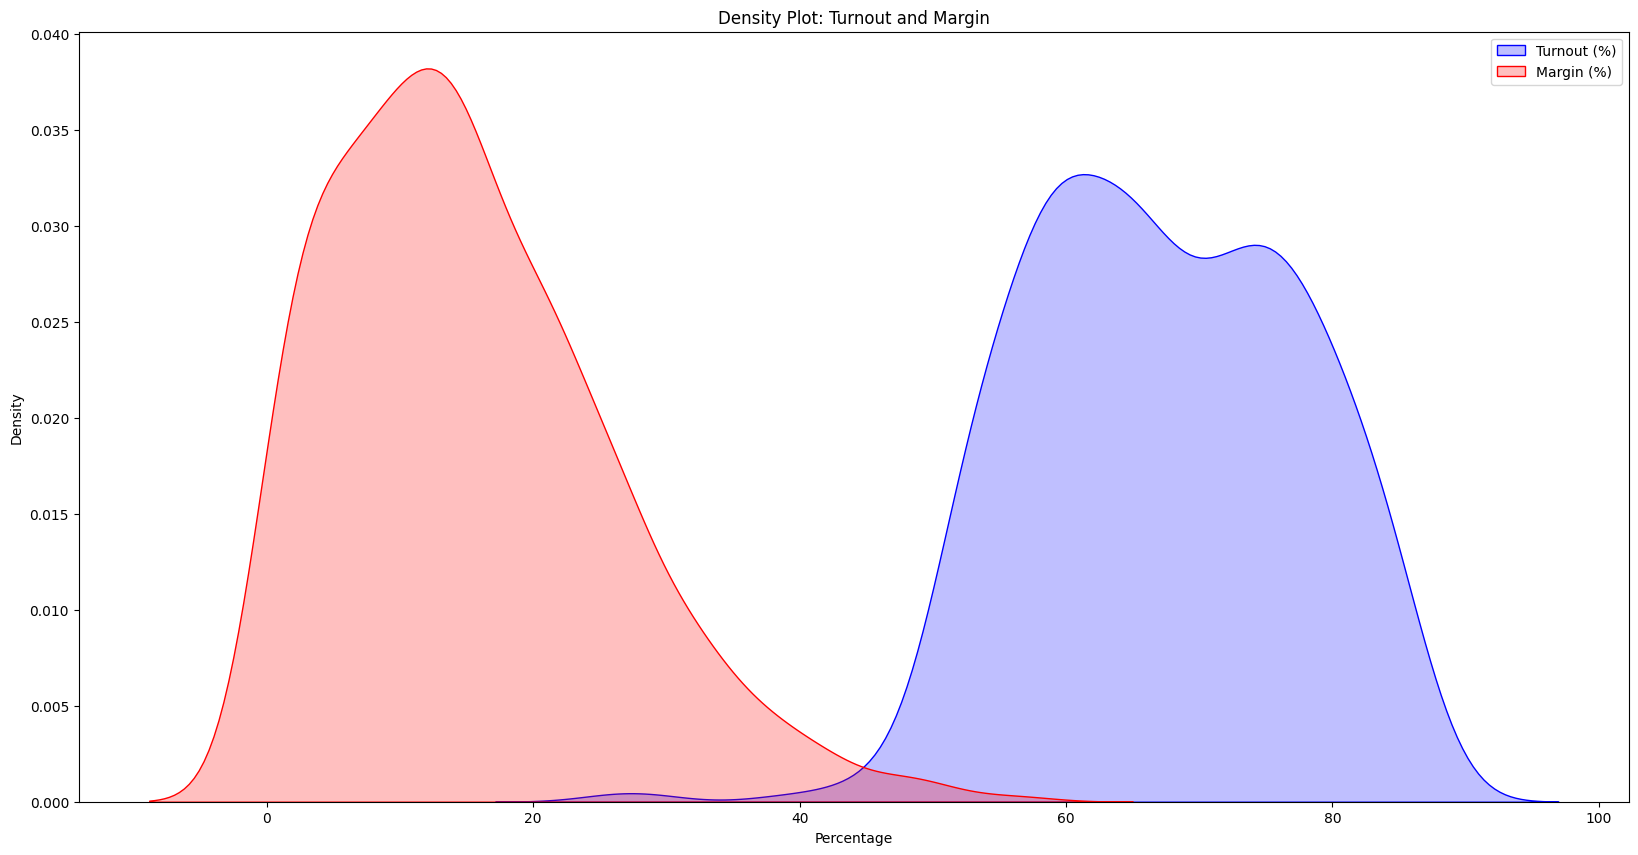

In [20]:
# research question: how are turnout and margin percentages distributed?
# density plot of turnout and margin percentages
plt.figure(figsize=(20, 10))
sns.kdeplot(df_2014["Turnout"], shade=True, color="blue", label="Turnout (%)")
sns.kdeplot(df_2014["Margin %"], shade=True, color="red", label="Margin (%)")
plt.title("Density Plot: Turnout and Margin")
plt.xlabel("Percentage")
plt.legend()
plt.show()

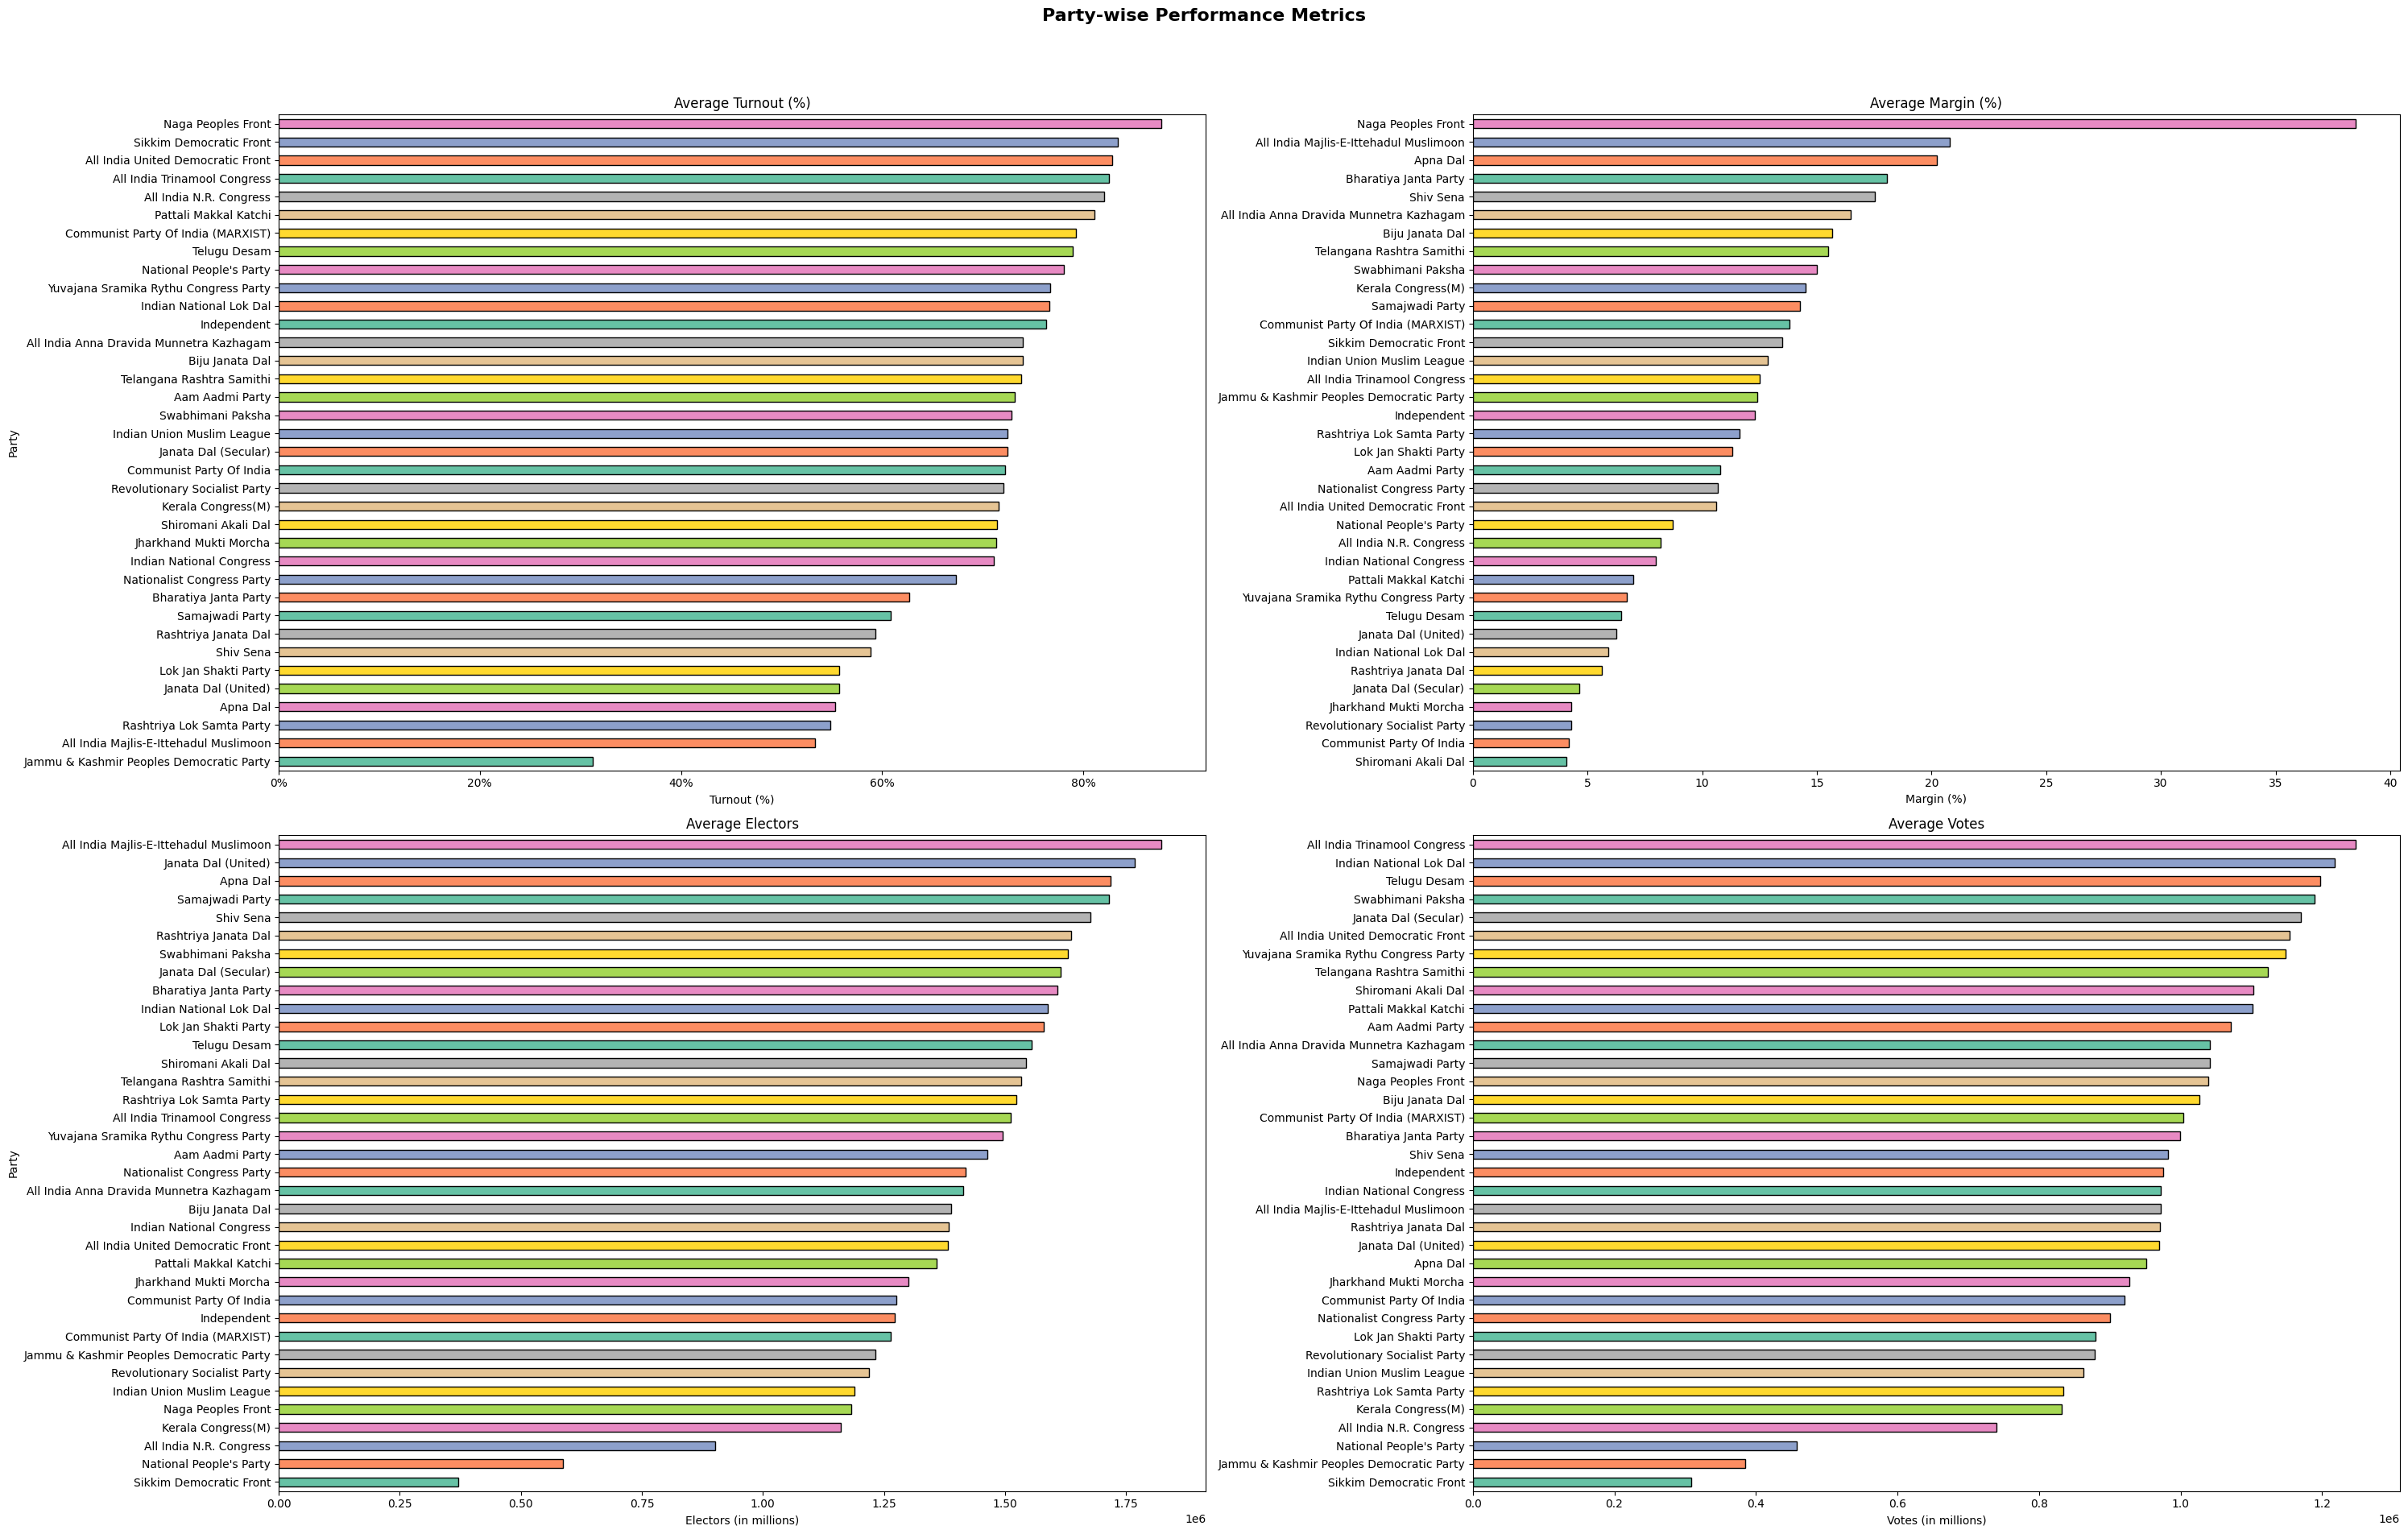

In [21]:
# research question: how do parties' performances compare in terms of turnout, margin, electors, and votes?
# party-wise performance analysis
party_performance = df_2014.groupby("Party")[["Turnout", "Margin %", "Electors", "Votes"]].mean()

fig, axes = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle("Party-wise Performance Metrics", fontsize=16, weight='bold')
colors = sns.color_palette("Set2", len(party_performance))

# turnout
party_performance["Turnout"].sort_values().plot(
    kind="barh", ax=axes[0, 0], color=colors, edgecolor="black"
)
axes[0, 0].set_title("Average Turnout (%)", fontsize=12)
axes[0, 0].set_xlabel("Turnout (%)")
axes[0, 0].set_ylabel("Party")
axes[0, 0].xaxis.set_major_formatter(mticker.PercentFormatter())

# Margin %
party_performance["Margin %"].sort_values().plot(
    kind="barh", ax=axes[0, 1], color=colors, edgecolor="black"
)
axes[0, 1].set_title("Average Margin (%)", fontsize=12)
axes[0, 1].set_xlabel("Margin (%)")
axes[0, 1].set_ylabel("")

# Electors
party_performance["Electors"].sort_values().plot(
    kind="barh", ax=axes[1, 0], color=colors, edgecolor="black"
)
axes[1, 0].set_title("Average Electors", fontsize=12)
axes[1, 0].set_xlabel("Electors (in millions)")
axes[1, 0].set_ylabel("Party")

# Votes
party_performance["Votes"].sort_values().plot(
    kind="barh", ax=axes[1, 1], color=colors, edgecolor="black"
)
axes[1, 1].set_title("Average Votes", fontsize=12)
axes[1, 1].set_xlabel("Votes (in millions)")
axes[1, 1].set_ylabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Data vis: 2019

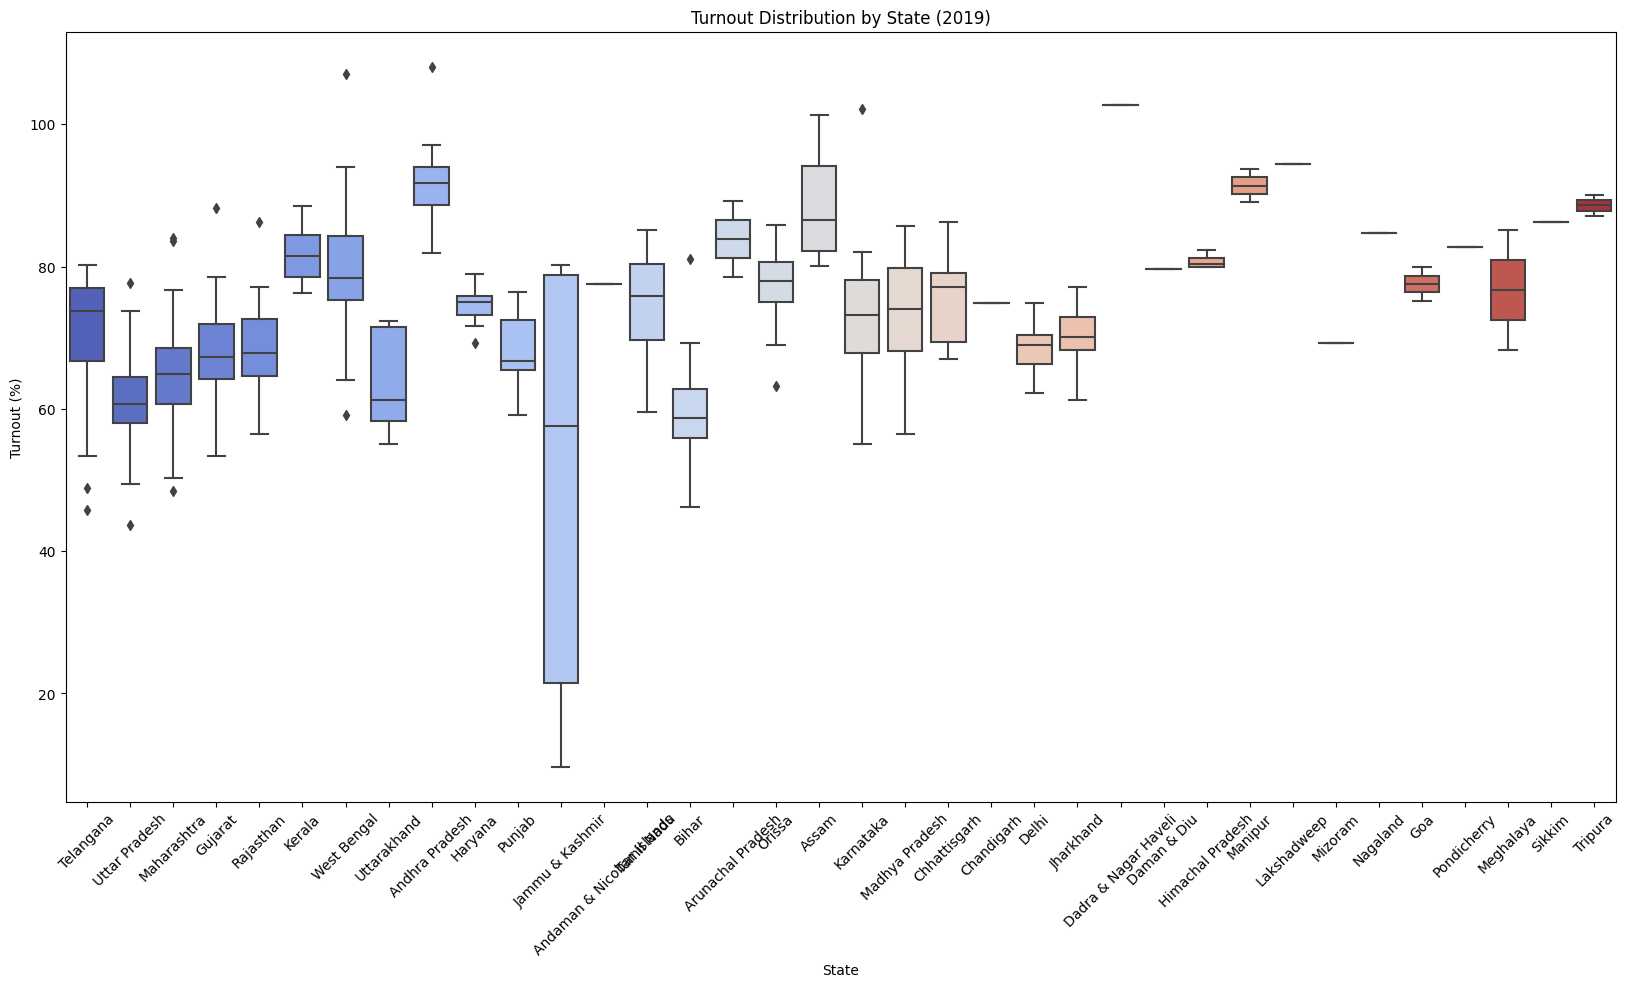

In [22]:
# Visualization 1
# Research question: What is the distribution of turnout across states in 2019?
# Boxplot of turnout distribution by state
plt.figure(figsize=(20, 10))
sns.boxplot(x="State", y="Turnout", data=df_2019, palette="coolwarm")
plt.title("Turnout Distribution by State (2019)")
plt.xticks(rotation=45)
plt.ylabel("Turnout (%)")
plt.xlabel("State")
plt.show()

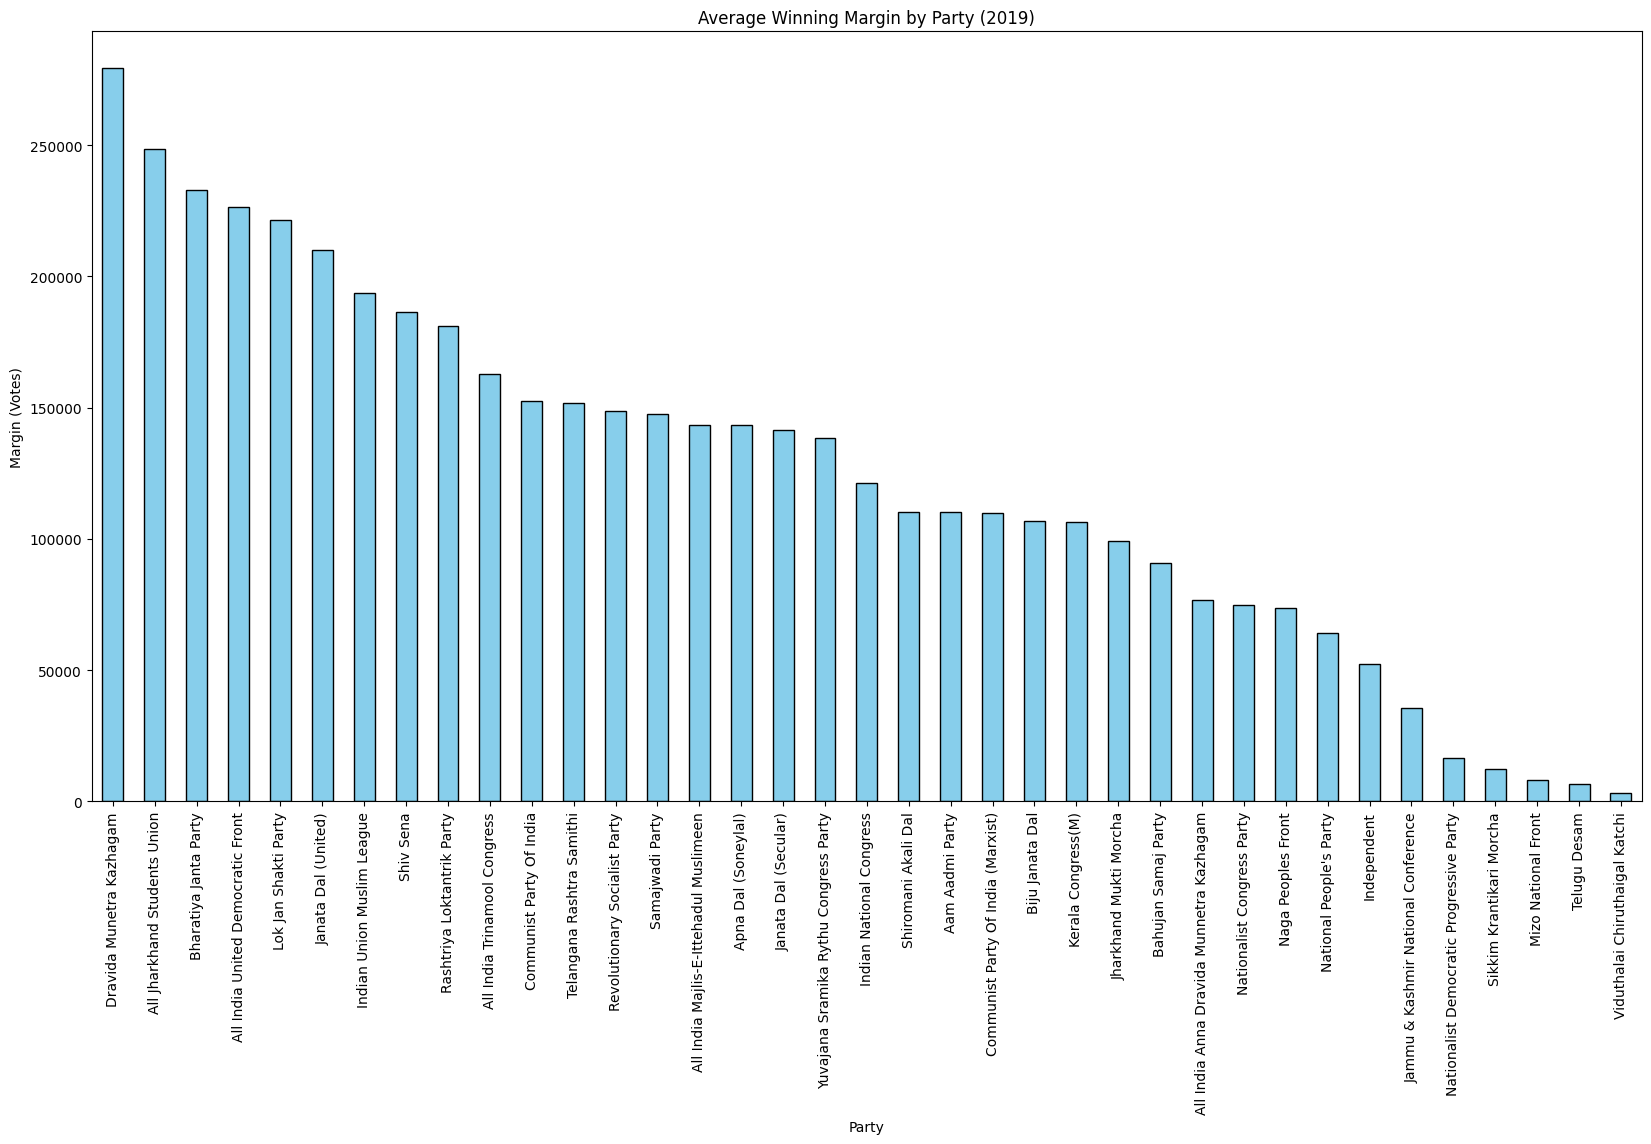

In [23]:
# Visualization 2
# Research question: Which parties had the highest average winning margin in 2019?
# Barplot of average winning margin by party
# Remove commas from the Margin column and convert to numeric
df_2019['Margin'] = df_2019['Margin'].str.replace(',', '').astype(float)

top_parties = df_2019.groupby("Party")["Margin"].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
top_parties.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Winning Margin by Party (2019)")
plt.ylabel("Margin (Votes)")
plt.xlabel("Party")
plt.show()


In [24]:
df_2019["Electors"] = pd.to_numeric(df_2019["Electors"], errors='coerce')
df_2019["Votes"] = pd.to_numeric(df_2019["Votes"], errors='coerce')

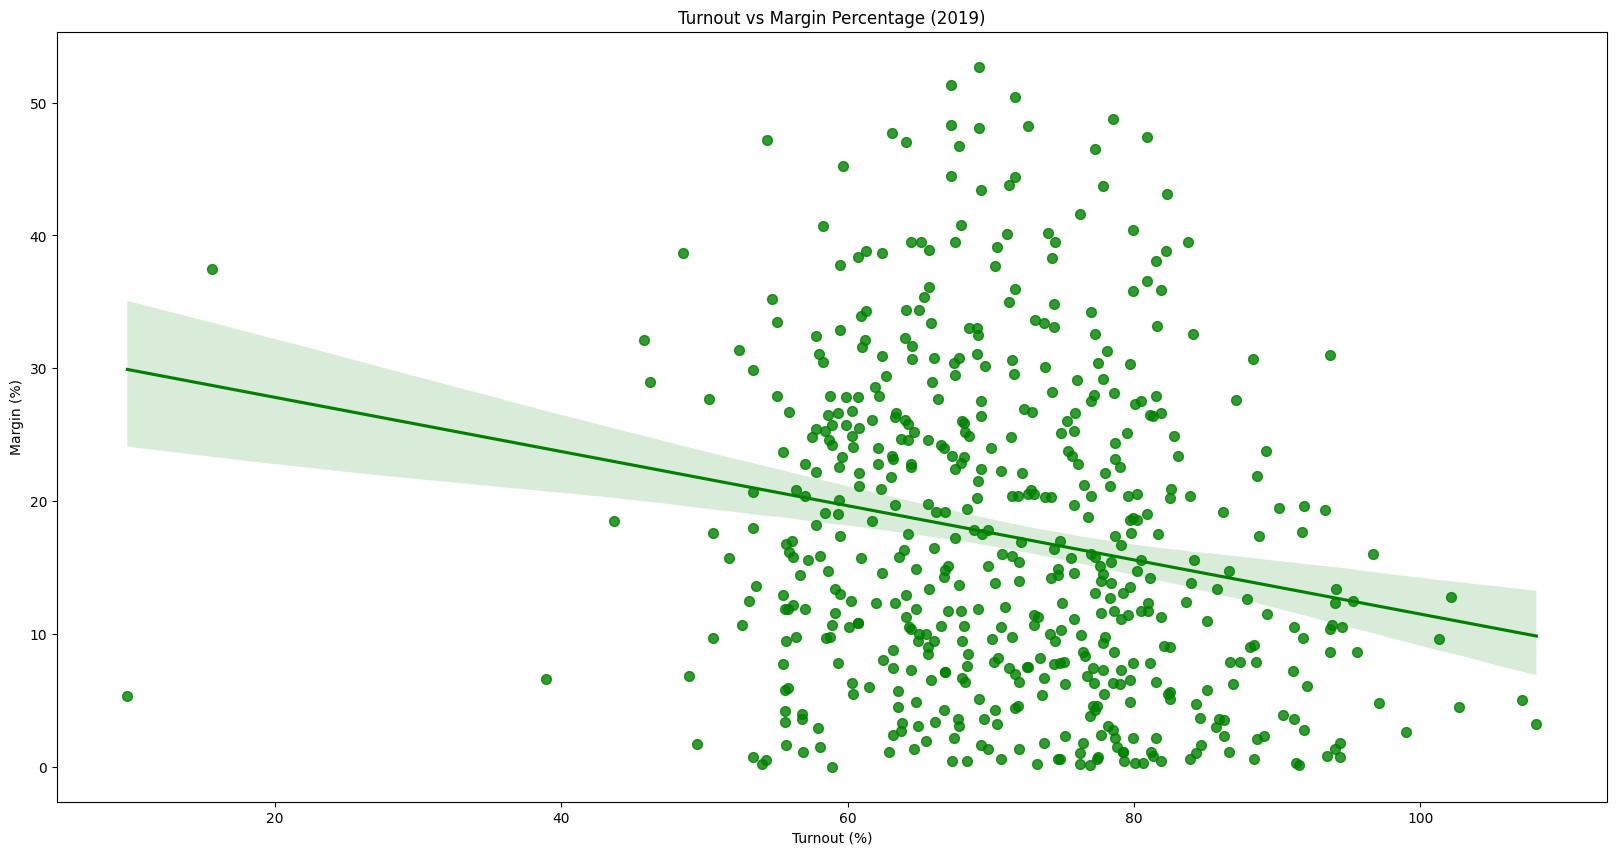

In [25]:
# Visualization 4
# Research question: Is there a relationship between turnout and margin percentage in 2019?
# Scatterplot with regression line for turnout vs margin percentage
plt.figure(figsize=(20, 10))
sns.regplot(x="Turnout", y="Margin %", data=df_2019, color="green", scatter_kws={"s": 50})
plt.title("Turnout vs Margin Percentage (2019)")
plt.xlabel("Turnout (%)")
plt.ylabel("Margin (%)")
plt.show()

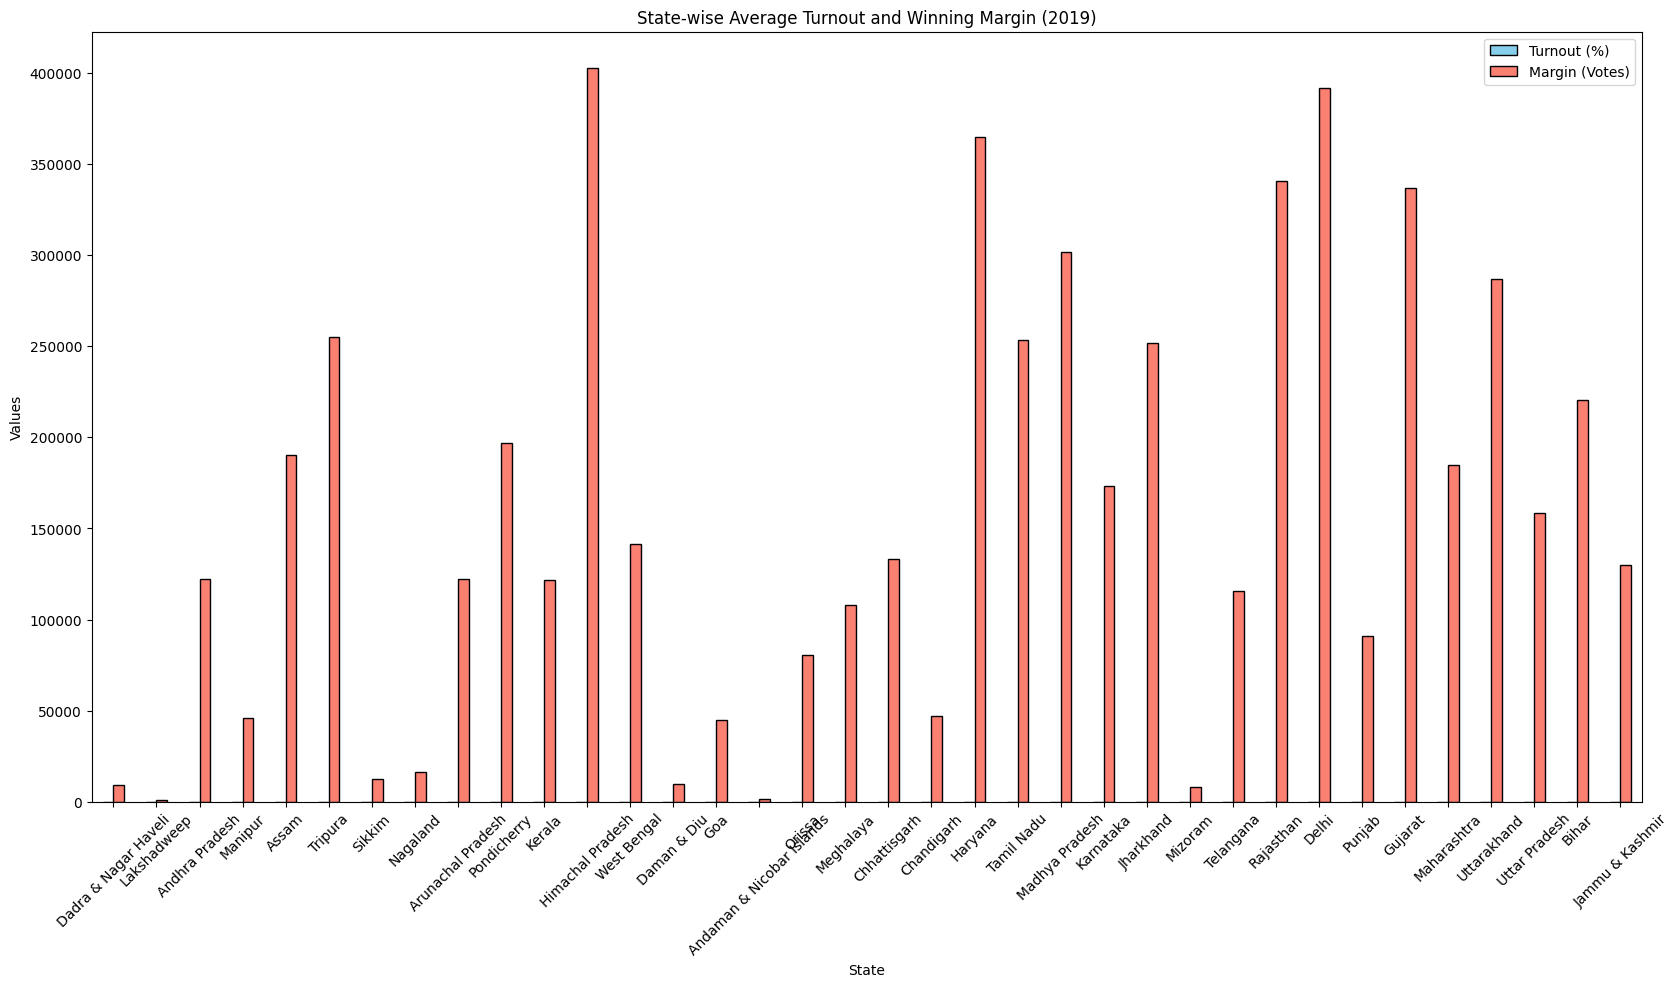

In [26]:
# Visualization 5
# Research question: How do state-wise turnout and margin compare in 2019?
# Barplot of state-wise average turnout and winning margin
df_grouped_state = df_2019.groupby("State")[["Turnout", "Margin"]].mean().sort_values(by="Turnout", ascending=False)
df_grouped_state.plot(kind="bar", figsize=(20, 10), color=["skyblue", "salmon"], edgecolor="black")
plt.title("State-wise Average Turnout and Winning Margin (2019)")
plt.ylabel("Values")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.legend(["Turnout (%)", "Margin (Votes)"])
plt.show()

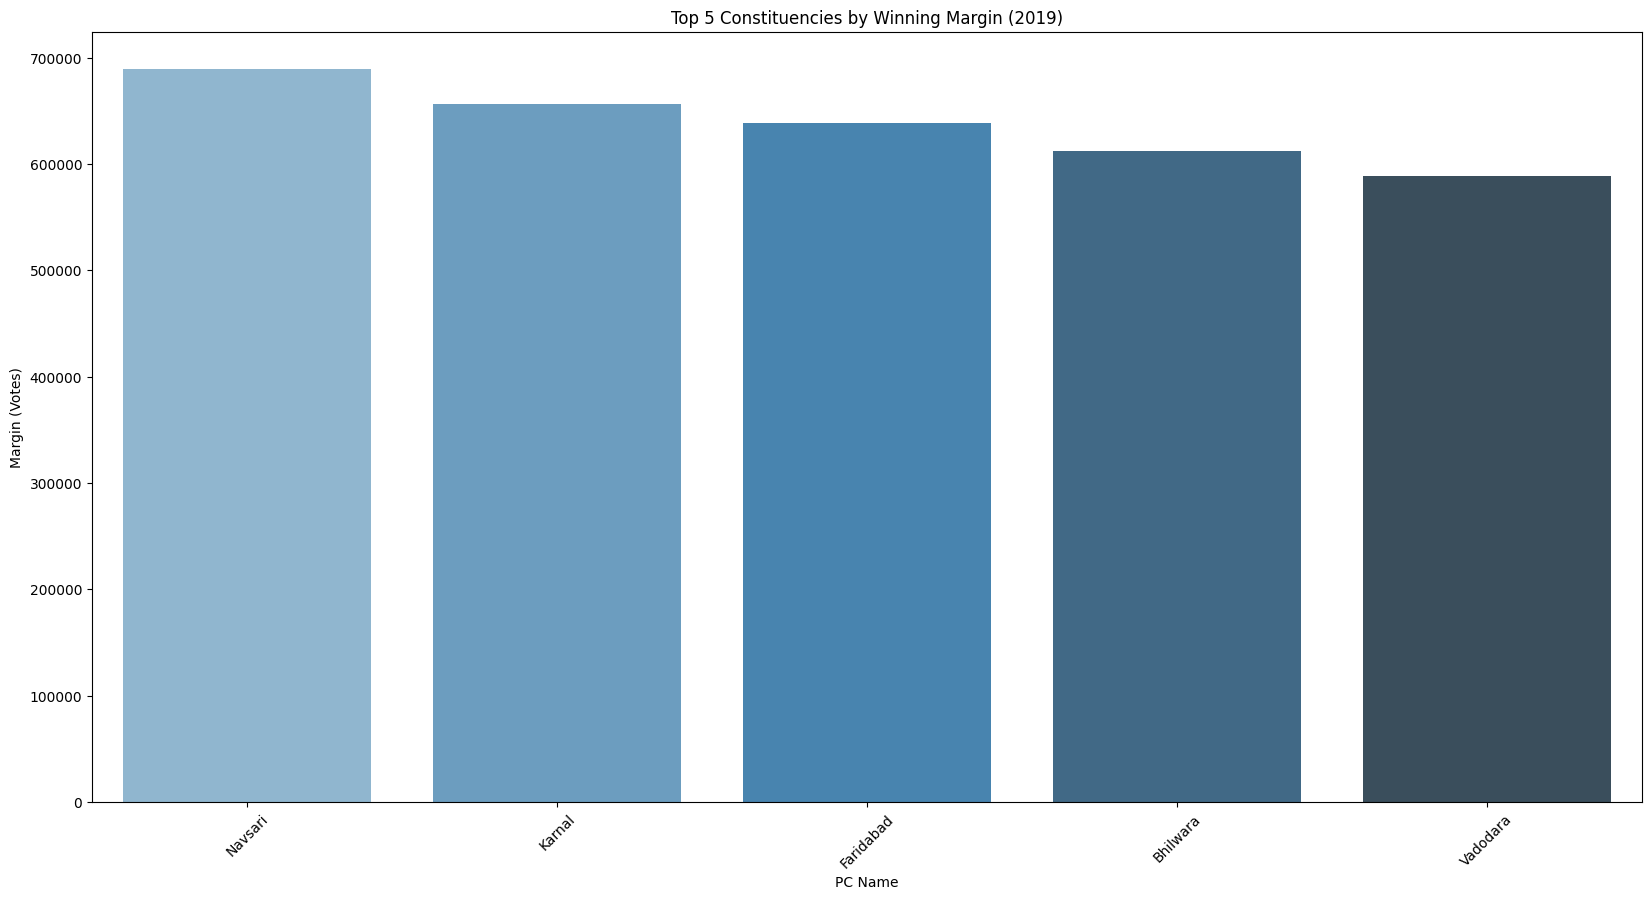

In [27]:
# Visualization 6
# Research question: Which constituencies had the highest winning margins in 2019?
# Barplot of top 5 constituencies by winning margin
top_5_margin = df_2019.nlargest(5, "Margin")
plt.figure(figsize=(20, 10))
sns.barplot(x="PC Name", y="Margin", data=top_5_margin, palette="Blues_d")
plt.title("Top 5 Constituencies by Winning Margin (2019)")
plt.ylabel("Margin (Votes)")
plt.xlabel("PC Name")
plt.xticks(rotation=45)
plt.show()

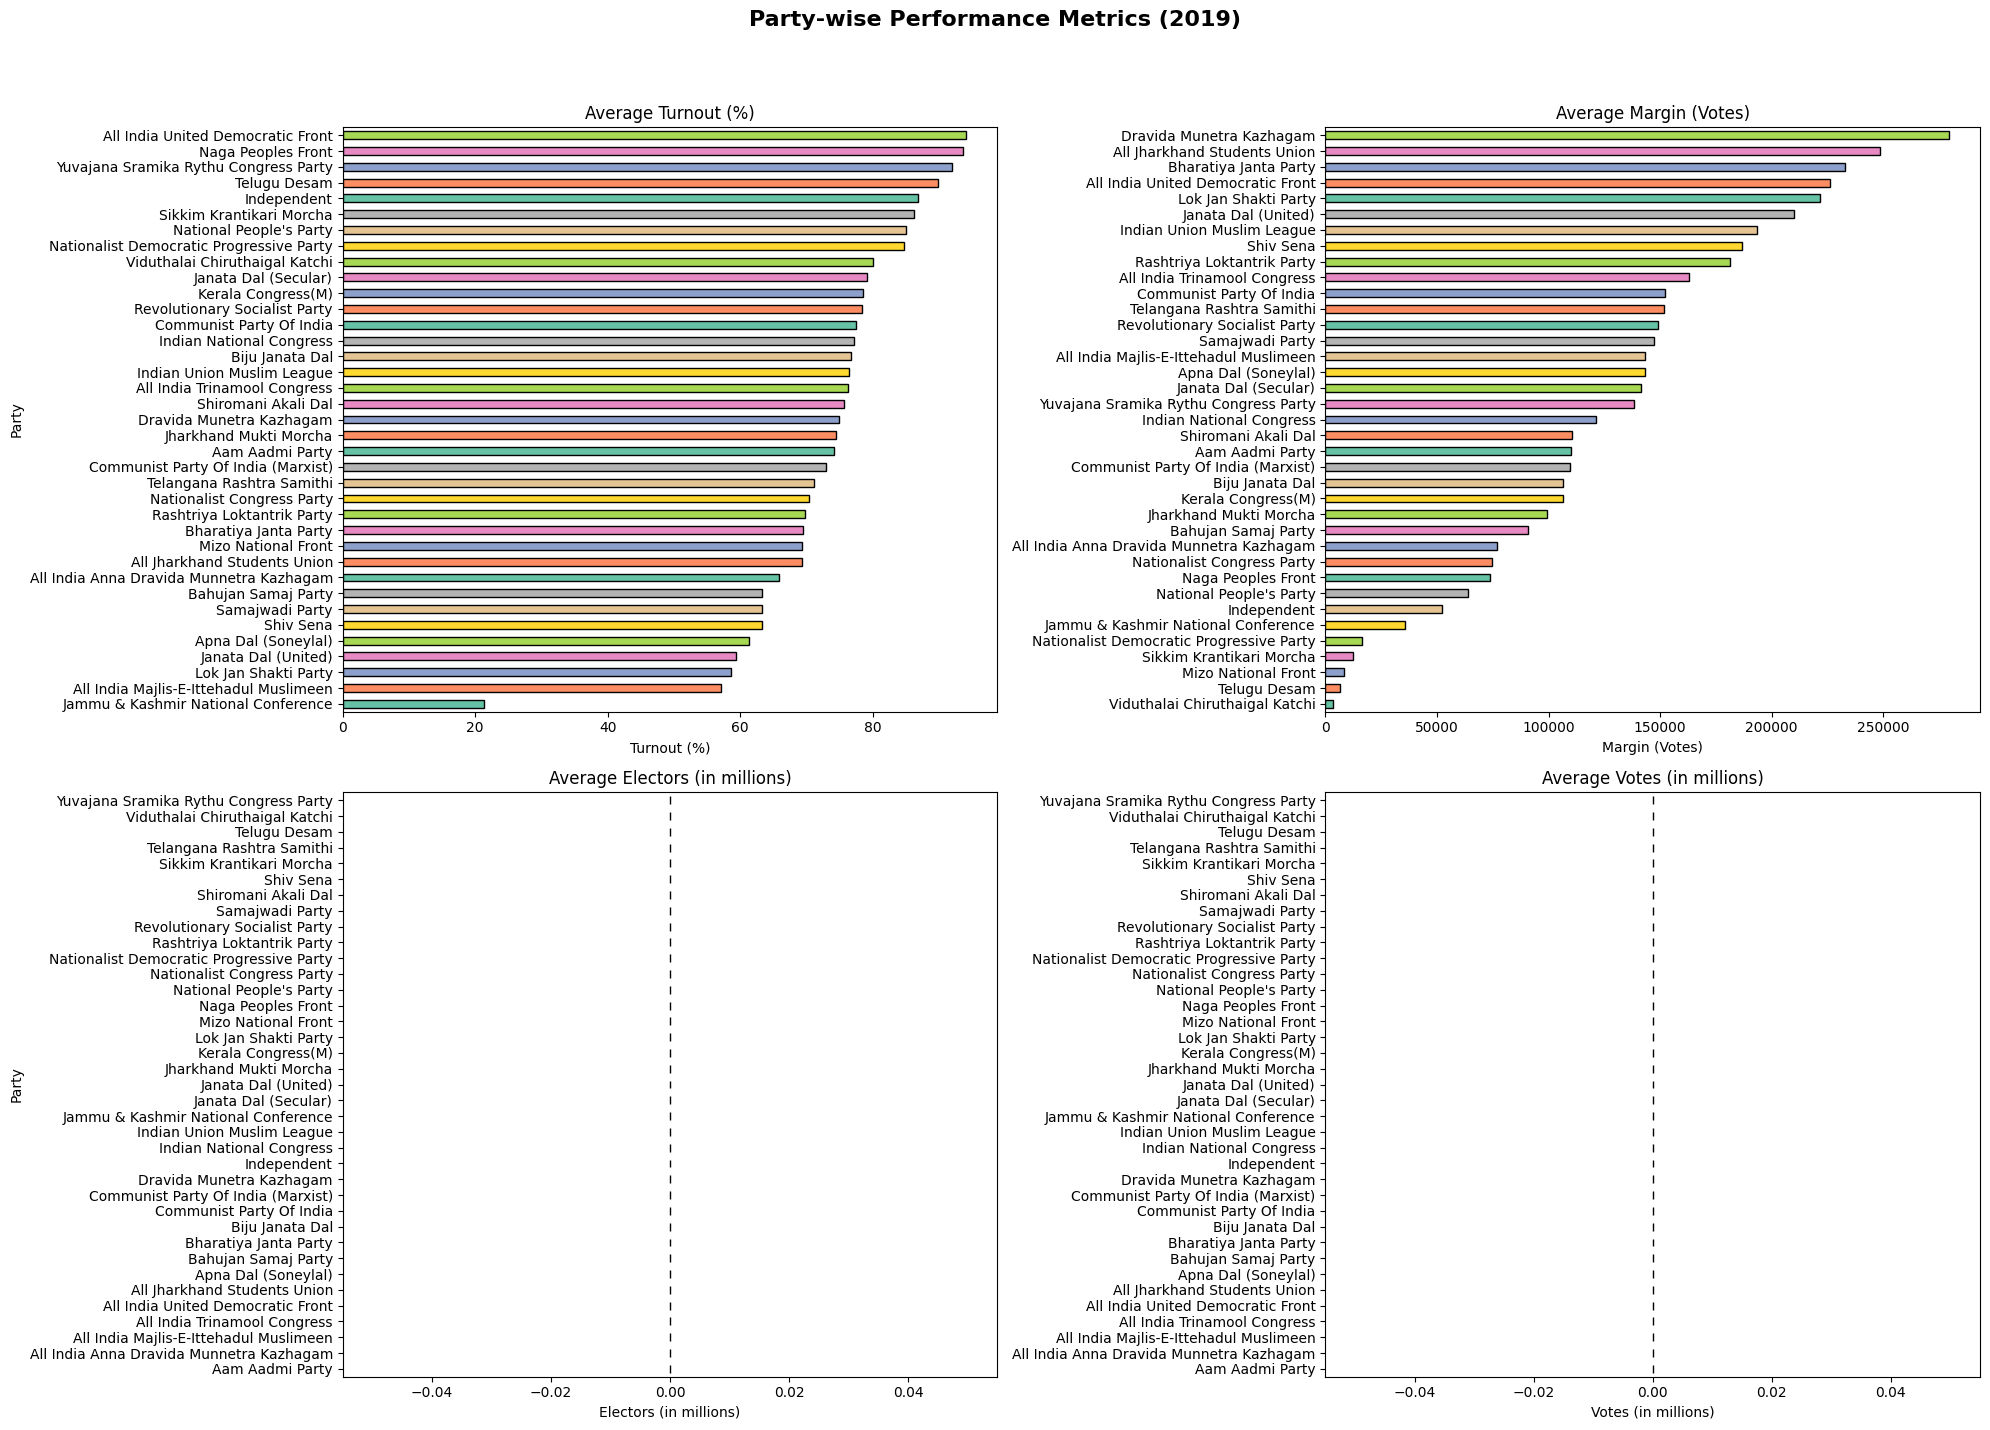

In [28]:
# Visualization 7
# Research question: How do parties perform in terms of turnout, margin percentage, electors, and votes in 2019?
# Party-wise performance metrics (turnout, margin %, electors, votes)

# We should group by 'Party' and calculate the mean for the relevant columns
party_performance = df_2019.groupby("Party")[["Turnout", "Margin", "Electors", "Votes"]].mean()

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("Party-wise Performance Metrics (2019)", fontsize=16, weight='bold')
colors = sns.color_palette("Set2", len(party_performance))

# Turnout
party_performance["Turnout"].sort_values().plot(kind="barh", ax=axes[0, 0], color=colors, edgecolor="black")
axes[0, 0].set_title("Average Turnout (%)")
axes[0, 0].set_xlabel("Turnout (%)")
axes[0, 0].set_ylabel("Party")

# Margin %
party_performance["Margin"].sort_values().plot(kind="barh", ax=axes[0, 1], color=colors, edgecolor="black")
axes[0, 1].set_title("Average Margin (Votes)")
axes[0, 1].set_xlabel("Margin (Votes)")
axes[0, 1].set_ylabel("")

# Electors
party_performance["Electors"].sort_values().plot(kind="barh", ax=axes[1, 0], color=colors, edgecolor="black")
axes[1, 0].set_title("Average Electors (in millions)")
axes[1, 0].set_xlabel("Electors (in millions)")
axes[1, 0].set_ylabel("Party")

# Votes
party_performance["Votes"].sort_values().plot(kind="barh", ax=axes[1, 1], color=colors, edgecolor="black")
axes[1, 1].set_title("Average Votes (in millions)")
axes[1, 1].set_xlabel("Votes (in millions)")
axes[1, 1].set_ylabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [29]:
df_2019["Votes"] = pd.to_numeric(df_2019["Votes"], errors='coerce')
df_2019["Electors"] = pd.to_numeric(df_2019["Electors"], errors='coerce')